In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal


# سوال ۸

In [3]:
!unzip "/content/drive/MyDrive/Q8_Dataset.zip"

Archive:  /content/drive/MyDrive/Q8_Dataset.zip
   creating: Q8_Dataset/
  inflating: __MACOSX/._Q8_Dataset   
  inflating: Q8_Dataset/.DS_Store    
  inflating: __MACOSX/Q8_Dataset/._.DS_Store  
   creating: Q8_Dataset/Images/
  inflating: __MACOSX/Q8_Dataset/._Images  
  inflating: Q8_Dataset/Images/c8.jpg  
  inflating: __MACOSX/Q8_Dataset/Images/._c8.jpg  
  inflating: Q8_Dataset/Images/m3.jpg  
  inflating: __MACOSX/Q8_Dataset/Images/._m3.jpg  
  inflating: Q8_Dataset/Images/c27.jpg  
  inflating: __MACOSX/Q8_Dataset/Images/._c27.jpg  
  inflating: Q8_Dataset/Images/c33.jpg  
  inflating: __MACOSX/Q8_Dataset/Images/._c33.jpg  
  inflating: Q8_Dataset/Images/m28.jpg  
  inflating: __MACOSX/Q8_Dataset/Images/._m28.jpg  
  inflating: Q8_Dataset/Images/m14.jpg  
  inflating: __MACOSX/Q8_Dataset/Images/._m14.jpg  
  inflating: Q8_Dataset/Images/m15.jpg  
  inflating: __MACOSX/Q8_Dataset/Images/._m15.jpg  
  inflating: Q8_Dataset/Images/m29.jpg  
  inflating: __MACOSX/Q8_Dataset/Images/


<div dir=rtl>
پس از unzip کردن فایل لازم است تا عکس های درون دیتاست را بخوانیم. برای این کار از کتابخانه‌ی CV2 استفاده میکنیم. برای آنکه سایز تمامی عکس ها یکسان باشد و دیتای منظم تری داشته باشیم از همین کتاب خانه برای تغییر سایز عکس ها استفاده میکنیم. 
</div>



In [72]:
base_folder = '/content/Q8_Dataset/Images'
images = []
folder = os.listdir(base_folder)
for im in folder:
  image = cv2.imread(os.path.join(base_folder, im))
  image = cv2.resize(image,(112,112))
  images.append(image)
images = np.array(images)

<div dir=rtl>
پس از خواندن تمامی عکس ها به طبقه بندی بر اساس رنگ عکس ها میپردازیم. برای اینکار با استفاده از کتابخانه CV2 میانگین رنگ در هر عکس را بدست آورده و آن را تبدیل به ۳ کانال رنگی میکنیم. سپس ۲ کانال آبی و قرمز را باهم مقایسه میکنیم. اگر کانال آبی مقدار بیشتری داشت، پس رنگ عکس آبی و عکس در طبقه chelsea قرار میگیرد و label آن ۱ میشود در غیر این صورت عکس در طبقه manchester و label آن ۰ میشود.
</div>


In [73]:
features = []
Team = []
for image in images:
  channels = cv2.mean(image)
  observation = np.array([(channels[2], channels[1], channels[0])])
  img_mean = observation[0]
  if(img_mean[2] > img_mean[0]):
    features.append([img_mean[0], img_mean[2]])
    Team.append(1)
    #chelsea
  else:
    features.append([img_mean[0], img_mean[2]])
    Team.append(0)
    #manchester
X = pd.DataFrame(features,columns=['R','B'])
y = pd.DataFrame(Team,columns=['class'])
print(X,y)

              R           B
0    144.047991  108.644531
1     97.178332   65.903300
2     36.803651   33.594228
3    144.032127  116.515545
4     92.955835  100.023677
..          ...         ...
117   72.367427   71.396604
118   58.110172   71.312500
119  111.657127   45.878827
120   69.949857   66.530692
121   50.770488   59.662548

[122 rows x 2 columns]      class
0        0
1        0
2        0
3        0
4        1
..     ...
117      0
118      1
119      0
120      0
121      1

[122 rows x 1 columns]


<div dir=rtl>
حال feature های هر کلاس را جدا میکنیم. سپس الگوریتم EM را برای تخمین پارامتر هاس توزیع GMM مربوط به هر کلاس را با تابع gaussianMixture از کتابخانه sklearn پیاده‌سازی میکنیم.<br> در ادامه پارامتر های بدست آمده برای GMM هر کلاس را مشاهده میکنید.
</div>


In [22]:
X_manchester = X[y['class'] == 0]
X_chelsea = X[y['class'] == 1]

In [65]:
def gmm_model(X,k,aic_bic):
  GMM = GaussianMixture(n_components=k, covariance_type='full').fit(X)
  print('Converged:',GMM.converged_)
  means = GMM.means_ 
  covariances = GMM.covariances_
  print('\u03BC = ', means, sep="\n")
  print('\u03A3 = ', covariances, sep="\n")
  if(aic_bic):
    return means,covariances,GMM.aic(X), GMM.bic(X)
  return means,covariances

print('Team manchester:')
means_manchester, covariances_manchester = gmm_model(X_manchester,k = 2, aic_bic = 0)

Team manchester:
Converged: True
μ = 
[[140.66279131  89.8697372 ]
 [ 87.85975399  60.3903072 ]]
Σ = 
[[[179.90559032 118.75390519]
  [118.75390519 463.93832578]]

 [[517.81964788 231.4196045 ]
  [231.4196045  275.8825617 ]]]


In [66]:
print('Team chelsea:')
means_chelsea, covariances_chelsea = gmm_model(X_chelsea,k = 2, aic_bic = 0)

Team chelsea:
Converged: True
μ = 
[[ 75.40077098  86.87922683]
 [106.99191421 137.20899606]]
Σ = 
[[[ 420.48466332  396.21947624]
  [ 396.21947624  424.74900909]]

 [[1045.04163064  719.85707872]
  [ 719.85707872  636.67987286]]]


<div dir=rtl>
حال به کشیدن نمودار داده ها و کانتور های مدل GMM هر کلاس توسط تابع multivariate_normal از کتابخانه scipy میپردازیم.
</div>


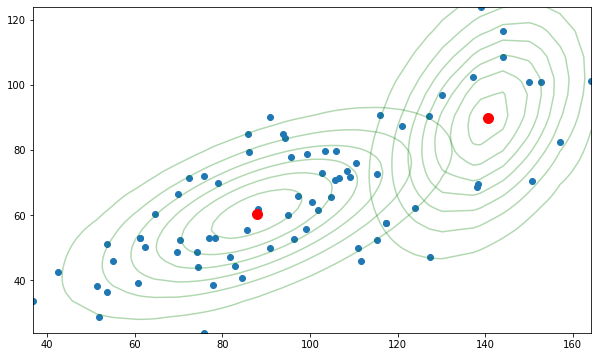

In [67]:
def draw_plot(X,means,covariances):
  x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
  XY = np.array([x.flatten(),y.flatten()]).T

  # Plot   
  fig = plt.figure(figsize=(10,6))
  ax0 = fig.add_subplot(111)
  ax0.scatter(X[:,0],X[:,1])
  for m,c in zip(means,covariances):
      multi_normal = multivariate_normal(mean=m,cov=c)
      ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='green',alpha=0.3)
      ax0.scatter(m[0],m[1],c='red',zorder=10,s=100)

  plt.show()

draw_plot(X_manchester.to_numpy(),means_manchester,covariances_manchester)

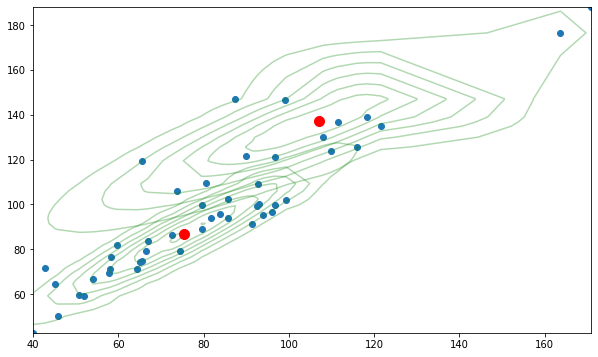

In [68]:
draw_plot(X_chelsea.to_numpy(),means_chelsea,covariances_chelsea)

<div dir=rtl>
در این بخش تمام مراحل بالا را به ازای تعداد کامپوننت های ۱ تا ۲۰ انجام میدهیم. در ادامه تمام پارامتر های تخمین زده شده برای هر k و نمودار داده ها و کانتور ها را برای آن تعداد k مشاهده میکنید. همچنین در آخر نمودار های bic و aic کشیده شده اند. برای بدست آوردن مقدار بهینه k، k ای را پیدا میکنیم که در آن مجموع bic و aic کمینه شده باشد.
</div>


Converged: True
μ = 
[[97.40187287 65.71758078]]
Σ = 
[[[869.55550034 441.52235878]
  [441.52235878 438.53155565]]]


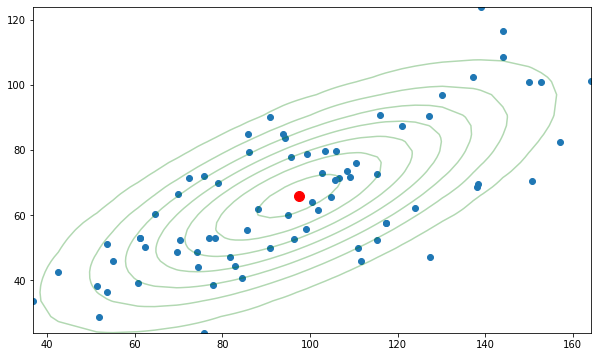

Converged: True
μ = 
[[ 87.85975399  60.3903072 ]
 [140.66279131  89.8697372 ]]
Σ = 
[[[517.81964788 231.4196045 ]
  [231.4196045  275.8825617 ]]

 [[179.90559032 118.75390519]
  [118.75390519 463.93832578]]]


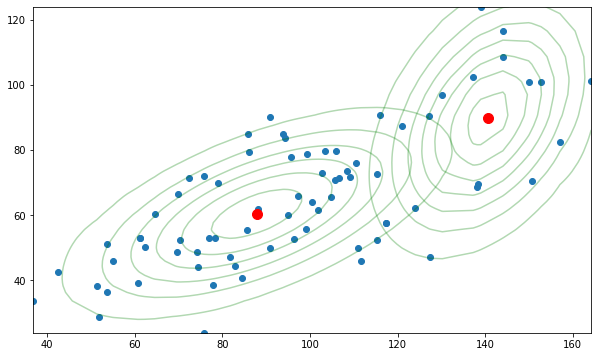

Converged: True
μ = 
[[105.02941197  69.31005207]
 [ 72.53014338  50.71747264]
 [139.84759667  92.95369038]]
Σ = 
[[[106.55947092 -87.58176895]
  [-87.58176895 147.03791534]]

 [[265.60113379  94.77841822]
  [ 94.77841822 152.28576319]]

 [[180.70459049  42.497404  ]
  [ 42.497404   284.36503122]]]


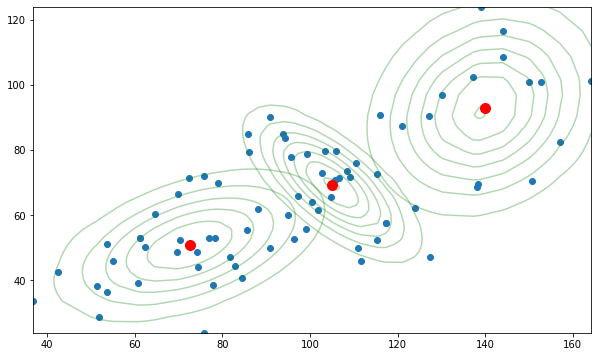

Converged: True
μ = 
[[129.98290771  99.13287173]
 [ 72.22413336  50.54257704]
 [105.0267346   69.11560614]
 [149.7111139   84.39745339]]
Σ = 
[[[140.63257257 158.43236945]
  [158.43236945 224.98463214]]

 [[258.47564708  90.41236069]
  [ 90.41236069 149.54740699]]

 [[109.72136102 -89.61515148]
  [-89.61515148 148.40685935]]

 [[ 85.07263567  99.49055688]
  [ 99.49055688 231.17898111]]]


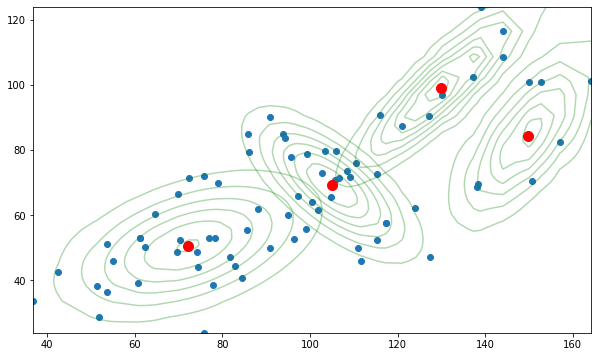

Converged: True
μ = 
[[ 55.16525673  44.26838963]
 [138.3296215  101.41457294]
 [103.55952452  69.26544588]
 [ 78.6166853   52.68189309]
 [136.26639209  67.19714379]]
Σ = 
[[[ 80.0483634   53.52830863]
  [ 53.52830863  82.99035437]]

 [[200.55160362  78.73391773]
  [ 78.73391773 122.84326919]]

 [[ 96.39380995 -68.11611677]
  [-68.11611677 142.57094897]]

 [[ 61.44897859  -3.37828893]
  [ -3.37828893 152.9667958 ]]

 [[225.12014764 131.69783173]
  [131.69783173  85.42377974]]]


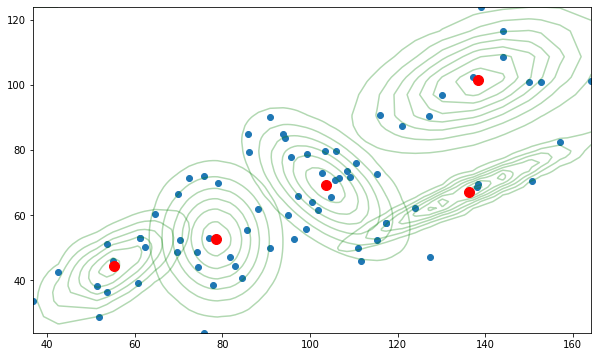

Converged: True
μ = 
[[ 78.0590491   52.68017538]
 [ 99.24570404  79.51398379]
 [138.94484017 101.78358853]
 [127.70395444  60.13005972]
 [ 56.35910337  45.55671272]
 [101.18022153  63.7516573 ]]
Σ = 
[[[ 32.82298073  -2.25206199]
  [ -2.25206199 171.42998086]]

 [[ 77.27503101 -35.62722641]
  [-35.62722641  28.71364816]]

 [[190.32950661  68.8697043 ]
  [ 68.8697043  118.09872294]]

 [[234.77061405 150.00061843]
  [150.00061843 121.47643673]]

 [[ 87.48295217  64.18447333]
  [ 64.18447333  96.64142354]]

 [[ 40.01173112  49.7944553 ]
  [ 49.7944553   77.63647791]]]


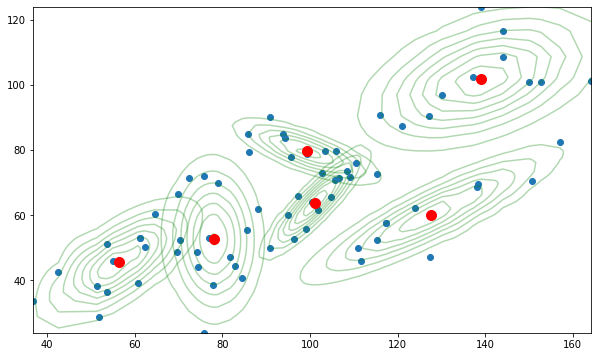

Converged: True
μ = 
[[ 62.1816686   41.05328749]
 [138.51995391 101.54708055]
 [103.03573855  77.05503661]
 [116.45051925  48.5264943 ]
 [ 90.36911871  56.20297493]
 [133.25918609  65.90787412]
 [ 72.23166296  67.06772898]]
Σ = 
[[[207.15206114  27.8952008 ]
  [ 27.8952008   74.28648218]]

 [[195.52227572  73.3948661 ]
  [ 73.3948661  119.06744127]]

 [[ 46.72074841 -25.62819202]
  [-25.62819202  23.92242874]]

 [[ 51.34628599  -4.33809788]
  [ -4.33809788   5.96609946]]

 [[135.52547553  80.46434559]
  [ 80.46434559  75.49599986]]

 [[230.3221053  126.25263937]
  [126.25263937  75.57762078]]

 [[127.21946636 144.04209296]
  [144.04209296 172.6877565 ]]]


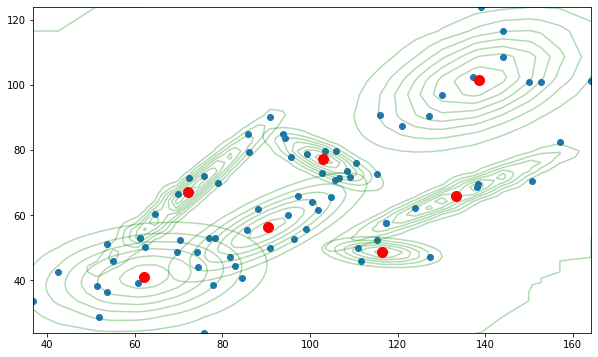

Converged: True
μ = 
[[149.09723222 108.67832626]
 [106.50789047  68.79689888]
 [ 88.75014152  51.48651082]
 [ 67.78445879  51.35970648]
 [138.90481945  68.8983692 ]
 [ 76.31859527  72.10719011]
 [126.36813543  93.66079967]
 [ 50.45428044  37.92395717]]
Σ = 
[[[ 6.69917876e+01 -5.83536661e+01]
  [-5.83536661e+01  8.11387670e+01]]

 [[ 8.33068437e+01 -8.19950534e+01]
  [-8.19950534e+01  1.48713914e+02]]

 [[ 9.60753301e+01  9.94929512e+01]
  [ 9.94929512e+01  1.51201795e+02]]

 [[ 6.48268888e+01 -1.50232784e-01]
  [-1.50232784e-01  3.28957146e+00]]

 [[ 1.88864821e+02  1.06557999e+02]
  [ 1.06557999e+02  6.83741708e+01]]

 [[ 7.88938194e+01  7.76920970e+01]
  [ 7.76920970e+01  8.47443765e+01]]

 [[ 6.87416500e+01  4.55958592e+01]
  [ 4.55958592e+01  3.79365299e+01]]

 [[ 5.86867953e+01  9.76290172e+00]
  [ 9.76290172e+00  2.92621731e+01]]]


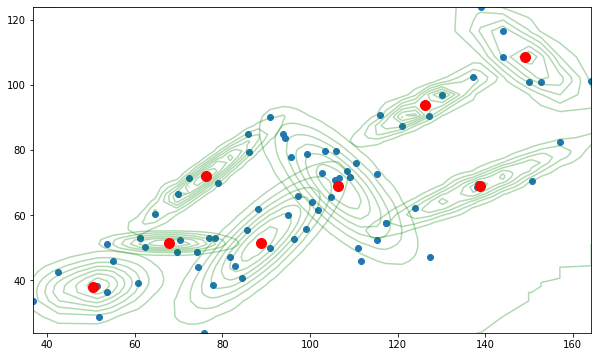

Converged: True
μ = 
[[133.12078371  65.78534691]
 [ 79.16304647  68.58304747]
 [ 56.1019943   45.51300894]
 [149.08992459 108.66821181]
 [101.20506259  63.78931943]
 [ 77.60637865  46.91635159]
 [ 98.78905259  79.68755641]
 [126.6428572   93.83285063]
 [116.6028723   48.4012733 ]]
Σ = 
[[[230.0701672  127.70222096]
  [127.70222096  77.39027126]]

 [[ 38.00641652 -25.078988  ]
  [-25.078988    18.01518424]]

 [[ 82.46935565  61.97598364]
  [ 61.97598364  96.04795268]]

 [[ 66.90936601 -58.2889405 ]
  [-58.2889405   81.20064606]]

 [[ 34.09681613  42.08145156]
  [ 42.08145156  67.28860573]]

 [[ 29.36506772  -6.58140504]
  [ -6.58140504  94.22082674]]

 [[ 79.54406196 -34.44365063]
  [-34.44365063  27.44034243]]

 [[ 63.52091875  42.02017864]
  [ 42.02017864  35.43059739]]

 [[ 51.28464738  -3.89382586]
  [ -3.89382586   5.67395306]]]


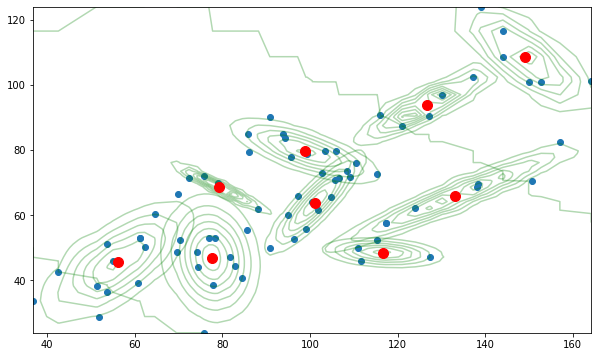

Converged: True
μ = 
[[102.72264289  77.71779781]
 [ 67.41717871  51.30012134]
 [144.32976073  71.92212753]
 [126.51601955  93.76488969]
 [ 81.33629497  45.18135899]
 [117.41033097  52.78989752]
 [ 76.61761656  72.53641558]
 [ 50.39937523  37.85886583]
 [149.07361803 108.68015565]
 [100.48329807  62.81563312]]
Σ = 
[[[ 55.93118051 -29.11841357]
  [-29.11841357  23.73546084]]

 [[ 63.08729067  -0.7574916 ]
  [ -0.7574916    3.24766959]]

 [[ 97.72575284  53.88064054]
  [ 53.88064054  38.89222914]]

 [[ 62.70326144  41.00923548]
  [ 41.00923548  34.50546998]]

 [[ 23.72307818  34.0494433 ]
  [ 34.0494433  110.97076081]]

 [[ 31.92286479   6.36158845]
  [  6.36158845  29.3070504 ]]

 [[ 85.30918111  88.24812489]
  [ 88.24812489  99.44806466]]

 [[ 58.3661745    9.35931333]
  [  9.35931333  28.86464872]]

 [[ 66.81591235 -58.07410965]
  [-58.07410965  80.72485727]]

 [[ 27.22703076  33.13141649]
  [ 33.13141649  56.49002422]]]


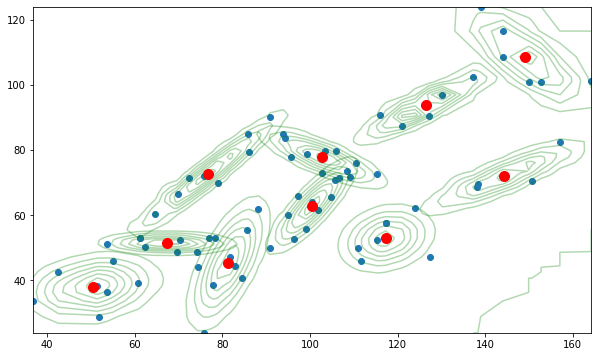

Converged: True
μ = 
[[117.33044153  52.69828205]
 [ 49.65281653  36.73783629]
 [142.32076854 116.5313269 ]
 [101.3251806   78.43120601]
 [ 58.8853133   50.79740096]
 [ 97.3761306   60.83787452]
 [144.61426191  72.0703035 ]
 [126.33989024  93.62416504]
 [ 74.76814246  70.12639387]
 [155.63045052 101.02636121]
 [ 76.86407339  45.36845697]]
Σ = 
[[[ 3.18959618e+01  5.71569223e+00]
  [ 5.71569223e+00  2.86847806e+01]]

 [[ 5.95251431e+01  3.46107055e+00]
  [ 3.46107055e+00  2.15885546e+01]]

 [[ 5.75742231e+00 -1.29023691e+01]
  [-1.29023691e+01  3.90491961e+01]]

 [[ 7.30790256e+01 -4.21729693e+01]
  [-4.21729693e+01  3.50640207e+01]]

 [[ 1.30874487e+01  4.73689411e+00]
  [ 4.73689411e+00  6.57837620e+00]]

 [[ 5.44499233e+01  4.26447543e+01]
  [ 4.26447543e+01  5.87170955e+01]]

 [[ 9.30465718e+01  5.16369289e+01]
  [ 5.16369289e+01  3.79347413e+01]]

 [[ 6.00617066e+01  3.86351777e+01]
  [ 3.86351777e+01  3.24832992e+01]]

 [[ 5.14413748e+01  4.11094374e+01]
  [ 4.11094374e+01  3.7761

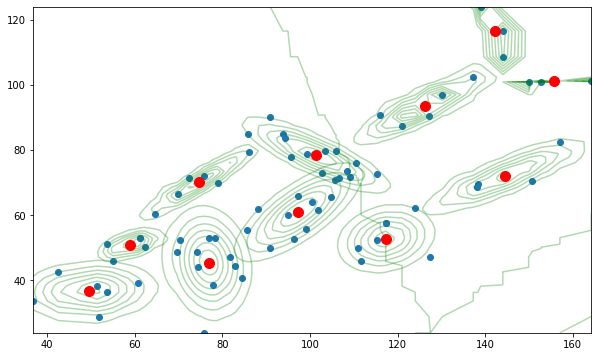

Converged: True
μ = 
[[142.34592519  69.5145813 ]
 [ 68.58254141  51.18990174]
 [ 98.58096322  79.80743837]
 [160.6303498   91.87829098]
 [117.69783847  53.22418418]
 [145.99175119 110.24528544]
 [ 82.08693089  45.21287556]
 [126.47861685  93.75576843]
 [ 74.24614574  69.93600503]
 [ 50.41742224  38.06770968]
 [103.40544536  68.1240848 ]
 [ 95.10695442  52.73738042]]
Σ = 
[[[ 34.41073984   3.65367307]
  [  3.65367307   0.54834039]]

 [[ 62.9884775   -9.17545166]
  [ -9.17545166  17.1602299 ]]

 [[ 78.39657133 -33.31268686]
  [-33.31268686  26.85232133]]

 [[ 12.78929137  33.41779424]
  [ 33.41779424  87.31907338]]

 [[ 32.06300672   8.5841894 ]
  [  8.5841894   31.65314177]]

 [[ 24.10777048 -42.14273982]
  [-42.14273982  82.91629114]]

 [[ 19.97735454  55.159002  ]
  [ 55.159002   162.8768246 ]]

 [[ 64.48908645  42.2823167 ]
  [ 42.2823167   35.39699181]]

 [[ 11.51138795   3.5653883 ]
  [  3.5653883    4.64171965]]

 [[ 57.69986191  10.26245935]
  [ 10.26245935  31.97840975]]

 [[ 2

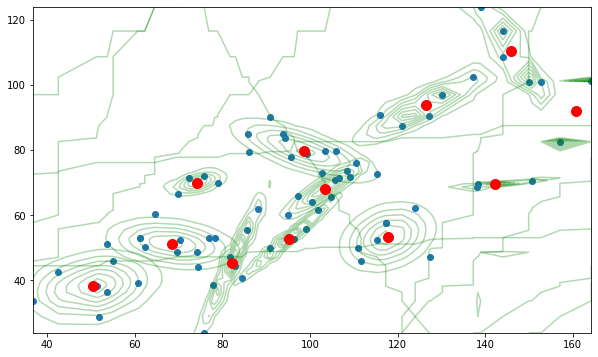

Converged: True
μ = 
[[ 71.75613064  49.67709828]
 [142.34592468  69.51458112]
 [103.56832999  68.02788952]
 [145.99094249 110.24462547]
 [ 98.31708475  79.99671699]
 [ 56.44637486  45.38746106]
 [126.46600258  93.74604292]
 [117.7034785   53.23266441]
 [ 95.09583501  52.58841441]
 [160.63034984  91.87829106]
 [ 47.36114341  35.92210918]
 [ 83.18078544  46.47939742]
 [ 74.24980257  69.93907994]]
Σ = 
[[[ 56.28846511 -23.11878979]
  [-23.11878979  29.42895099]]

 [[ 34.41073763   3.65367339]
  [  3.65367339   0.54834049]]

 [[ 26.40987529  21.33318293]
  [ 21.33318293  23.29738033]]

 [[ 24.09932932 -42.12395181]
  [-42.12395181  82.88292948]]

 [[ 76.71392279 -32.05903033]
  [-32.05903033  25.99893399]]

 [[  8.93519273 -13.86713808]
  [-13.86713808  23.3019297 ]]

 [[ 64.49284567  42.26149897]
  [ 42.26149897  35.36577145]]

 [[ 32.06633832   8.62301595]
  [  8.62301595  31.70423339]]

 [[ 32.84854396  35.19147996]
  [ 35.19147996  39.65002487]]

 [[ 12.78929137  33.41779424]
  [ 33.4

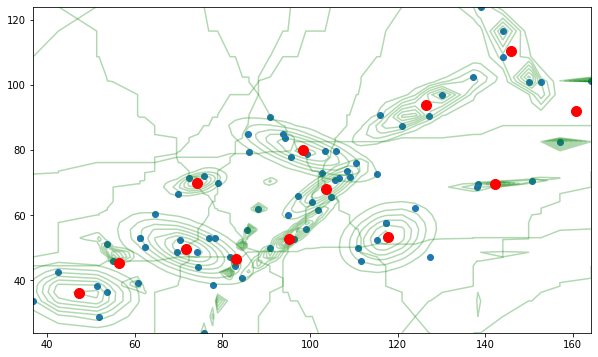

Converged: True
μ = 
[[105.99423792  75.42689943]
 [ 83.19501474  46.57247051]
 [126.31954532  93.61192693]
 [ 58.82480448  50.82917951]
 [ 99.65788227  61.63129317]
 [145.72448826  72.6231229 ]
 [127.4946588   47.11806441]
 [ 90.67260674  83.92221512]
 [155.63045054 101.02636122]
 [ 74.2590226   69.94635366]
 [ 49.70461403  36.79825675]
 [ 75.45641084  48.47348593]
 [116.02615556  54.18100198]
 [142.32063436 116.53194137]]
Σ = 
[[[ 2.83291436e+01 -9.88589717e+00]
  [-9.88589717e+00  1.16342987e+01]]

 [[ 2.43320471e+01  7.54649848e+01]
  [ 7.54649848e+01  2.34735848e+02]]

 [[ 6.04906114e+01  3.88701502e+01]
  [ 3.88701502e+01  3.25838695e+01]]

 [[ 1.27808000e+01  4.66908406e+00]
  [ 4.66908406e+00  6.59085147e+00]]

 [[ 2.56981132e+01  3.07625848e+01]
  [ 3.07625848e+01  5.30779380e+01]]

 [[ 7.21074324e+01  4.13868210e+01]
  [ 4.13868210e+01  3.33695261e+01]]

 [[ 1.00000000e-06  2.82727748e-26]
  [ 2.82727748e-26  1.00000000e-06]]

 [[ 1.52831623e+01  5.22646536e-01]
  [ 5.2264653

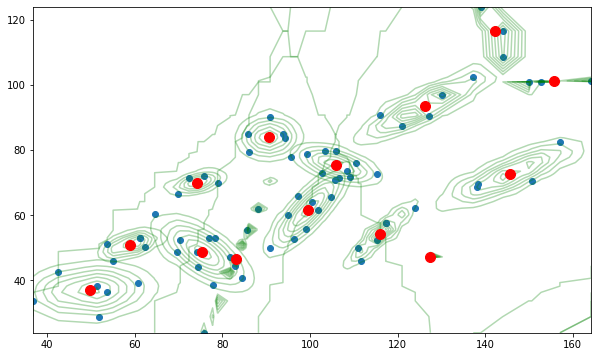

Converged: True
μ = 
[[149.76534993 102.81772811]
 [ 74.03618675  49.85739725]
 [117.46399903  52.8643021 ]
 [ 90.15613015  84.53938454]
 [ 54.38334764  35.71934161]
 [123.78345384  91.55077443]
 [ 98.65413831  60.16349923]
 [144.36197015  71.94407385]
 [ 59.66767001  52.26058982]
 [ 82.40074261  44.5392492 ]
 [108.55267686  72.69360499]
 [141.50199298 120.26992986]
 [ 39.67482451  38.05636143]
 [ 74.26961967  69.95476367]
 [101.07256699  78.96368183]]
Σ = 
[[[ 80.56234954 -11.41668178]
  [-11.41668178   8.86573355]]

 [[ 10.64518144   2.09747565]
  [  2.09747565  10.49815392]]

 [[ 31.99743799   6.79339786]
  [  6.79339786  29.74173094]]

 [[ 13.20548292   4.2265603 ]
  [  4.2265603   11.38459826]]

 [[ 13.9267524    8.25046114]
  [  8.25046114  18.06500602]]

 [[ 31.96049538  14.03547375]
  [ 14.03547375  13.34276394]]

 [[ 21.23925894  23.79808608]
  [ 23.79808608  43.48793942]]

 [[ 97.52053868  53.84321009]
  [ 53.84321009  38.92362015]]

 [[ 15.90310283  13.27053712]
  [ 13.27053

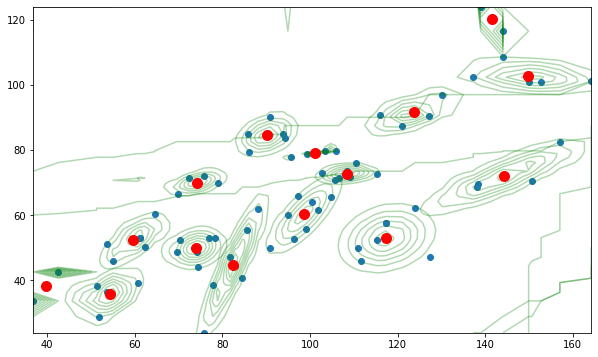

Converged: True
μ = 
[[ 47.36099959  35.92173127]
 [105.02663266  75.98796837]
 [134.65951945  99.60791391]
 [ 75.99708903  49.57337002]
 [ 64.96941974  52.87208158]
 [138.1983817   69.07920121]
 [117.70928128  53.23695967]
 [ 89.95896722  84.54705698]
 [155.63042092 101.02636054]
 [ 74.24544624  69.93566126]
 [ 82.38495466  44.72369879]
 [ 56.43223225  45.41481185]
 [ 99.83711761  61.8706474 ]
 [118.54508472  89.08622655]
 [141.50199298 120.26992985]
 [153.84705835  76.45950255]]
Σ = 
[[[ 4.30149409e+01 -4.92203472e+00]
  [-4.92203472e+00  2.11888809e+01]]

 [[ 3.61149305e+01 -1.31860020e+01]
  [-1.31860020e+01  1.27250369e+01]]

 [[ 4.31021777e+01  4.33232896e+01]
  [ 4.33232896e+01  4.50231419e+01]]

 [[ 2.88495592e+00  5.30278853e+00]
  [ 5.30278853e+00  1.37713413e+01]]

 [[ 1.61812173e+01 -3.63641761e+00]
  [-3.63641761e+00  1.39291017e+01]]

 [[ 1.61788769e-02  6.40980563e-02]
  [ 6.40980563e-02  2.53962681e-01]]

 [[ 3.21016304e+01  8.68717775e+00]
  [ 8.68717775e+00  3.1654252

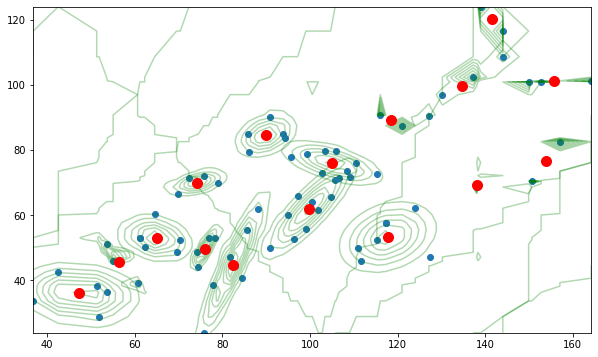

Converged: True
μ = 
[[142.32072835 116.53151173]
 [ 74.01841048  49.86216489]
 [106.28317803  75.18031865]
 [142.34558407  69.51453559]
 [ 54.38356186  35.70435173]
 [126.31560699  93.61099708]
 [ 99.23960712  61.02732381]
 [120.25550905  55.40415648]
 [ 90.89740343  83.72128732]
 [ 74.27064392  69.95554723]
 [ 59.66223949  52.25095637]
 [155.63045054 101.02636122]
 [ 39.67482451  38.05636143]
 [ 75.81401467  23.79536033]
 [111.33645719  47.90006221]
 [157.05412946  82.53380102]
 [ 83.50548465  48.06496776]]
Σ = 
[[[ 5.75748093e+00 -1.29023365e+01]
  [-1.29023365e+01  3.90486172e+01]]

 [[ 1.05210800e+01  2.13889799e+00]
  [ 2.13889799e+00  1.05023739e+01]]

 [[ 2.52283483e+01 -8.73266104e+00]
  [-8.73266104e+00  1.15999793e+01]]

 [[ 3.44093579e+01  3.65357079e+00]
  [ 3.65357079e+00  5.48340691e-01]]

 [[ 1.39378636e+01  8.24762157e+00]
  [ 8.24762157e+00  1.79507715e+01]]

 [[ 6.04845438e+01  3.88417889e+01]
  [ 3.88417889e+01  3.25523935e+01]]

 [[ 2.48522697e+01  2.93885707e+01]


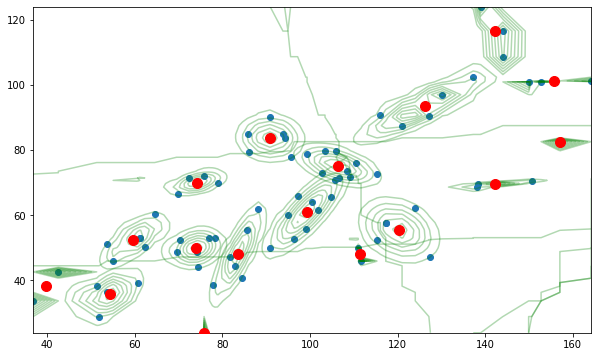

Converged: True
μ = 
[[ 96.77635823  62.59840758]
 [123.60391522  91.4090081 ]
 [ 54.36387477  35.86915037]
 [ 75.45642984  49.09569411]
 [141.50199298 120.26992985]
 [124.03635204  62.08450255]
 [ 74.66561811  70.02232804]
 [ 92.89725938  83.62611651]
 [106.89841327  74.61488901]
 [116.6326457   51.77559493]
 [153.84705835  76.45950255]
 [ 58.76068186  50.70605502]
 [ 89.10907634  47.31416341]
 [140.66188078 105.49710006]
 [ 39.67482445  38.05636135]
 [155.63042095 101.02636054]
 [138.1983817   69.07920121]
 [ 75.81401467  23.79536033]]
Σ = 
[[[ 5.89123836e+01  2.75242151e+01]
  [ 2.75242151e+01  1.91869193e+01]]

 [[ 3.01526478e+01  1.24215881e+01]
  [ 1.24215881e+01  1.20569805e+01]]

 [[ 1.36930945e+01  8.06587275e+00]
  [ 8.06587275e+00  1.89817158e+01]]

 [[ 1.99032625e+01 -3.39862309e+00]
  [-3.39862309e+00  1.17125087e+01]]

 [[ 6.40157870e+00 -9.49909577e+00]
  [-9.49909577e+00  1.40954045e+01]]

 [[ 1.00000000e-06  3.64516847e-26]
  [ 3.64516847e-26  1.00000000e-06]]

 [[ 5.0

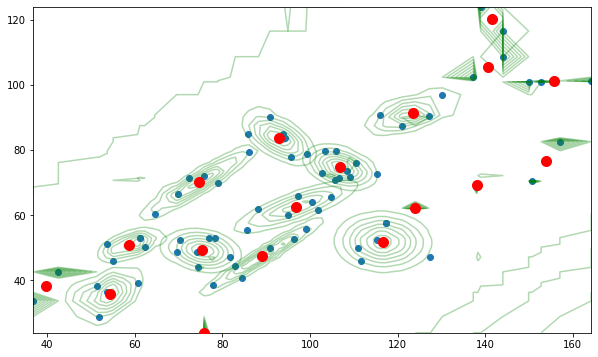

Converged: True
μ = 
[[ 84.7460528   49.96489525]
 [123.61375811  91.41517032]
 [120.2599985   55.39466052]
 [140.66188053 105.49709983]
 [ 54.38356701  35.70435762]
 [ 74.27057839  69.95551109]
 [101.07101448  78.96330236]
 [142.34558405  69.51453559]
 [ 74.17562875  49.80733223]
 [ 39.67482451  38.05636143]
 [ 98.63551713  60.13115007]
 [155.63042095 101.02636054]
 [ 76.7893779   31.16280058]
 [ 59.66110725  52.2518137 ]
 [ 90.16160068  84.53862999]
 [108.53799684  72.6960605 ]
 [141.50199298 120.26992985]
 [111.3364572   47.90006215]
 [157.05412946  82.53380102]]
Σ = 
[[[ 4.93129106e+00  1.35526617e+01]
  [ 1.35526617e+01  6.11573640e+01]]

 [[ 2.99870043e+01  1.23139862e+01]
  [ 1.23139862e+01  1.19917260e+01]]

 [[ 2.20043436e+01 -6.75495519e+00]
  [-6.75495519e+00  2.70539617e+01]]

 [[ 1.14658154e+01  1.06576156e+01]
  [ 1.06576156e+01  9.90638590e+00]]

 [[ 1.39378520e+01  8.24757974e+00]
  [ 8.24757974e+00  1.79507861e+01]]

 [[ 1.14534101e+01  3.48503865e+00]
  [ 3.48503865e+

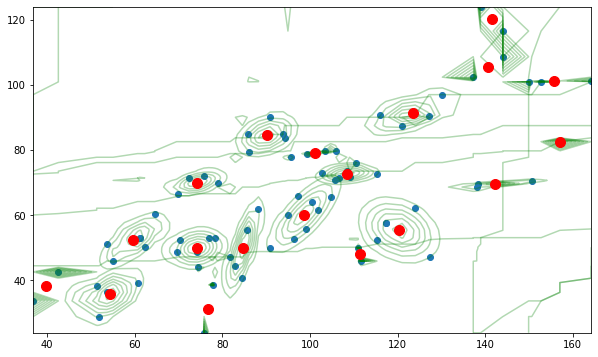

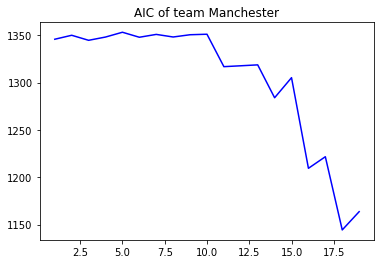

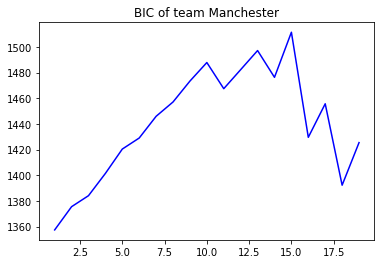

best k :   18


In [70]:
AIC = []
BIC = []

K = range(1,20)

for k in K:
    means_temp, covariance_temp, aic, bic= gmm_model(X_manchester,k = k, aic_bic = 1)
    draw_plot(X_manchester.to_numpy(), means_temp,covariance_temp)
    AIC.append(aic)
    BIC.append(bic)

plt.plot(K, AIC, 'b', label='aic')
plt.title("AIC of team Manchester")
plt.show()

plt.plot(K, BIC, 'b', label='bic')
plt.title("BIC of team Manchester")
plt.show()

sum_ab = [i + j for i,j in zip(AIC,BIC)]
best_k = sum_ab.index(min(sum_ab)) + 1
print("best k :  ", best_k)

Converged: True
μ = 
[[83.06947799 99.09670979]]
Σ = 
[[[755.54917135 767.05402072]
  [767.05402072 941.83114614]]]


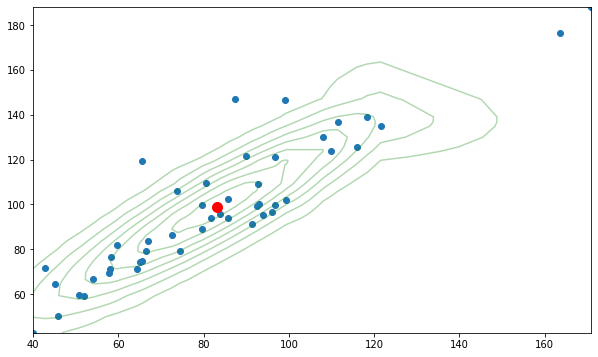

Converged: True
μ = 
[[ 99.25199602 125.3506001 ]
 [ 73.15122139  83.00571455]]
Σ = 
[[[993.04190816 809.26265148]
  [809.26265148 836.31610702]]

 [[351.1158206  321.19693318]
  [321.19693318 325.12990467]]]


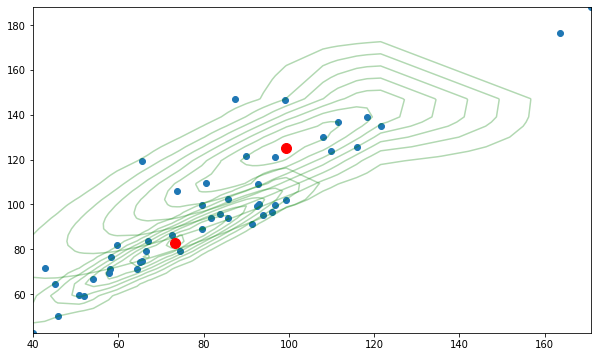

Converged: True
μ = 
[[ 62.57289816  74.27354222]
 [ 99.5324098  125.34666842]
 [ 91.76761339  96.79079353]]
Σ = 
[[[162.22127199 182.82930034]
  [182.82930034 230.54390737]]

 [[978.97194625 791.94034939]
  [791.94034939 803.60609035]]

 [[ 30.57889029  12.63904204]
  [ 12.63904204  11.70385812]]]


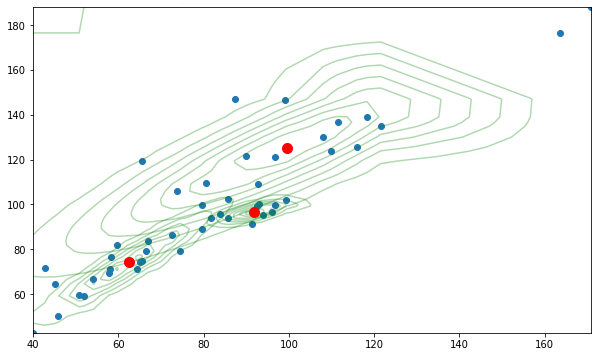

Converged: True
μ = 
[[ 90.13046955  97.2484207 ]
 [104.79594285 131.01933155]
 [ 43.25858291  57.35917749]
 [ 62.55292454  74.36793862]]
Σ = 
[[[ 38.148458     8.81165354]
  [  8.81165354  14.15996686]]

 [[791.56383557 573.83873092]
  [573.83873092 566.98537671]]

 [[  5.32971296   9.82655144]
  [  9.82655144 136.63320386]]

 [[ 71.63578963  69.14999952]
  [ 69.14999952  86.98747455]]]


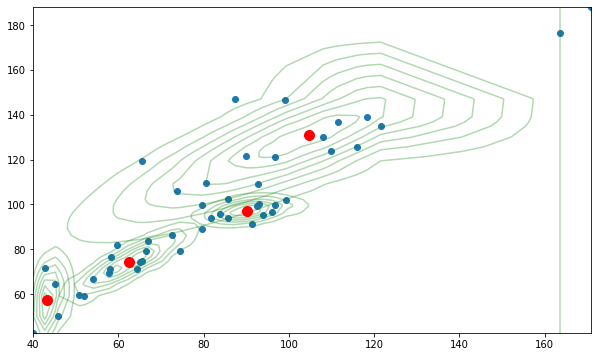

Converged: True
μ = 
[[ 59.4374927   71.87843234]
 [105.69281971 132.46548931]
 [ 91.10862006  98.08635621]
 [167.33231027 182.30935108]
 [ 76.17240093 107.35183848]]
Σ = 
[[[129.91266194 122.55330092]
  [122.55330092 157.18809759]]

 [[128.48897697  -2.56110994]
  [ -2.56110994  89.88336584]]

 [[ 32.24807564  10.55183143]
  [ 10.55183143  21.77544368]]

 [[ 12.97728354  21.06085578]
  [ 21.06085578  34.17970269]]

 [[ 48.57351974 -47.50497074]
  [-47.50497074  66.4268574 ]]]


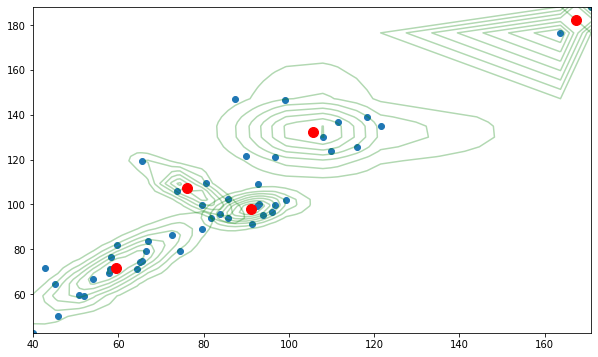

Converged: True
μ = 
[[ 89.56702654  96.96214489]
 [108.85758045 135.80404633]
 [ 46.48565538  58.62000464]
 [167.33231027 182.30935108]
 [ 84.24711907 113.91076227]
 [ 63.96599372  76.49051525]]
Σ = 
[[[ 41.51715251  10.71301267]
  [ 10.71301267  15.05697359]]

 [[111.41907776 -51.33595092]
  [-51.33595092  65.93193515]]

 [[ 21.91210093  15.73401137]
  [ 15.73401137  94.1244966 ]]

 [[ 12.97728354  21.06085578]
  [ 21.06085578  34.17970269]]

 [[138.29095279  24.80731193]
  [ 24.80731193  55.39803817]]

 [[ 43.07651299  30.59317428]
  [ 30.59317428  39.89250389]]]


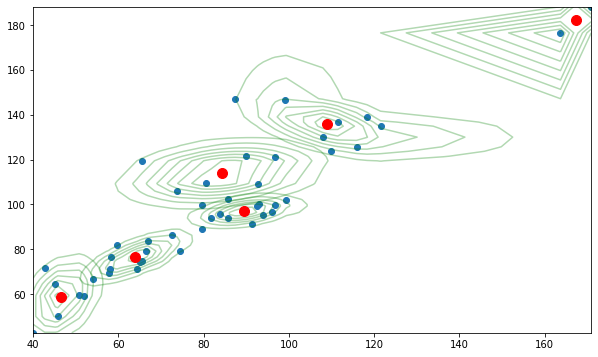

Converged: True
μ = 
[[ 84.32936825 113.86389801]
 [ 42.8764746   46.46348825]
 [167.33231027 182.30935108]
 [ 63.8622448   76.45429854]
 [108.85532129 135.82998013]
 [ 47.61535049  63.88726266]
 [ 89.5738996   96.94283833]]
Σ = 
[[[139.18330196  25.38556169]
  [ 25.38556169  56.3841127 ]]

 [[  8.33015475  10.52160922]
  [ 10.52160922  13.2895829 ]]

 [[ 12.97728354  21.06085578]
  [ 21.06085578  34.17970269]]

 [[ 42.12667203  29.35114814]
  [ 29.35114814  37.80794388]]

 [[111.64792884 -51.44728558]
  [-51.44728558  65.79235137]]

 [[ 14.81864838 -18.7258475 ]
  [-18.7258475   25.96890988]]

 [[ 41.51043368  10.79668722]
  [ 10.79668722  15.00068556]]]


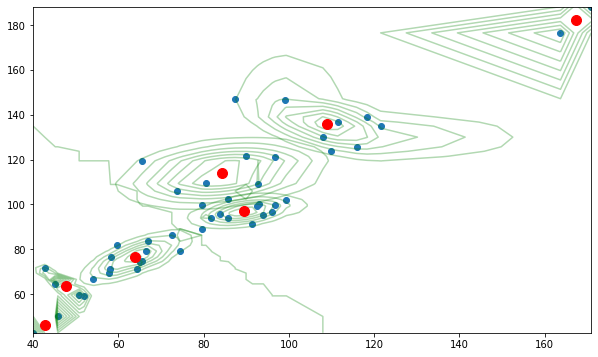

Converged: True
μ = 
[[ 93.24334343 146.90250319]
 [ 64.11549144  75.98704934]
 [167.33231027 182.30935108]
 [ 43.22499252  57.60387426]
 [ 94.71620637  99.65745569]
 [114.15513818 131.674669  ]
 [ 79.89506285 102.80795361]
 [ 93.34629925 121.38560275]]
Σ = 
[[[ 3.42841814e+01 -1.33918750e+00]
  [-1.33918750e+00  5.23115162e-02]]

 [[ 9.78110522e+01  9.45863978e+01]
  [ 9.45863978e+01  1.11572853e+02]]

 [[ 1.29772835e+01  2.10608558e+01]
  [ 2.10608558e+01  3.41797027e+01]]

 [[ 5.23960393e+00  9.71408767e+00]
  [ 9.71408767e+00  1.38577358e+02]]

 [[ 6.30060055e+00  7.19992871e-01]
  [ 7.19992871e-01  1.99254929e+01]]

 [[ 2.31893838e+01  1.26010633e+01]
  [ 1.26010633e+01  3.19483411e+01]]

 [[ 5.25756136e+01 -5.35908669e+01]
  [-5.35908669e+01  7.43316086e+01]]

 [[ 1.15884241e+01 -4.60530044e-01]
  [-4.60530044e-01  1.83027068e-02]]]


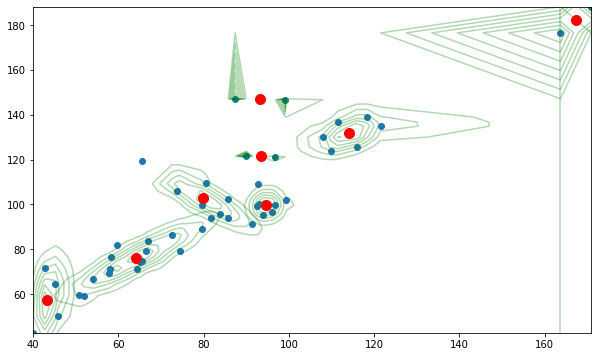

Converged: True
μ = 
[[ 82.75546206  95.75084584]
 [114.1521719  131.71016241]
 [ 47.61585217  63.88365662]
 [167.33231027 182.30935108]
 [ 83.52391385 113.87696175]
 [ 94.7406069   97.75811647]
 [ 93.24334342 146.90250319]
 [ 42.87647464  46.46348831]
 [ 63.67018264  76.30063024]]
Σ = 
[[[ 6.58784838e+00  3.98670637e+00]
  [ 3.98670637e+00  1.73137614e+01]]

 [[ 2.38674534e+01  1.28952887e+01]
  [ 1.28952887e+01  3.19865224e+01]]

 [[ 1.48059280e+01 -1.87001921e+01]
  [-1.87001921e+01  2.59269618e+01]]

 [[ 1.29772835e+01  2.10608558e+01]
  [ 2.10608558e+01  3.41797027e+01]]

 [[ 1.22466540e+02  1.63788760e+01]
  [ 1.63788760e+01  4.91595479e+01]]

 [[ 6.80931144e+00  5.32306185e+00]
  [ 5.32306185e+00  1.07725899e+01]]

 [[ 3.42841814e+01 -1.33918750e+00]
  [-1.33918750e+00  5.23115162e-02]]

 [[ 8.33015475e+00  1.05216092e+01]
  [ 1.05216092e+01  1.32895829e+01]]

 [[ 3.90035333e+01  2.67190573e+01]
  [ 2.67190573e+01  3.57833985e+01]]]


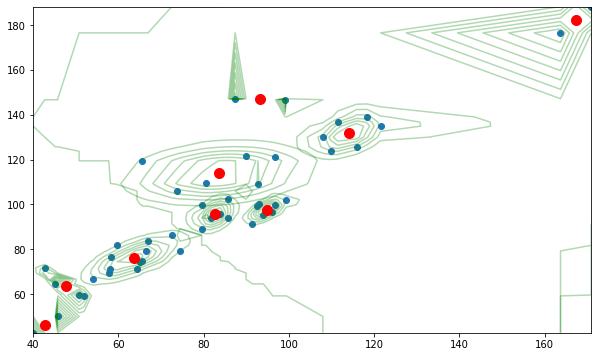

Converged: True
μ = 
[[ 45.99568148  58.22016316]
 [114.15508407 131.67457936]
 [ 94.48310636  99.15835362]
 [167.33231027 182.30935108]
 [ 63.35946711  75.88069736]
 [ 93.34629925 121.38560275]
 [ 93.24334343 146.90250319]
 [ 78.17990242 104.90089538]
 [ 83.33653593  95.00582621]
 [ 65.62619579 119.45591518]]
Σ = 
[[[ 1.93353354e+01  1.29335429e+01]
  [ 1.29335429e+01  9.61562675e+01]]

 [[ 2.31895399e+01  1.26014705e+01]
  [ 1.26014705e+01  3.19488431e+01]]

 [[ 6.51935576e+00  2.23716556e+00]
  [ 2.23716556e+00  2.29292405e+01]]

 [[ 1.29772835e+01  2.10608558e+01]
  [ 2.10608558e+01  3.41797027e+01]]

 [[ 4.20836721e+01  3.13697881e+01]
  [ 3.13697881e+01  4.24134593e+01]]

 [[ 1.15884241e+01 -4.60530044e-01]
  [-4.60530044e-01  1.83027068e-02]]

 [[ 3.42841814e+01 -1.33918750e+00]
  [-1.33918750e+00  5.23115162e-02]]

 [[ 1.03411888e+01 -1.22957510e+00]
  [-1.22957510e+00  1.63532312e+01]]

 [[ 5.74357830e+00  8.02369490e+00]
  [ 8.02369490e+00  1.77802175e+01]]

 [[ 1.00000000e-0

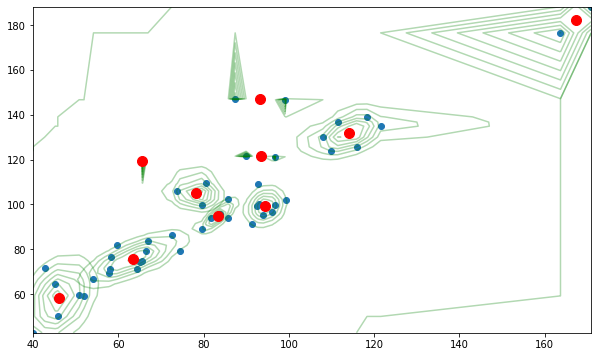

Converged: True
μ = 
[[ 63.75307696  76.32267133]
 [111.20888718 126.47421632]
 [167.33231027 182.30935108]
 [ 82.75014048  95.92790211]
 [ 46.44639345  58.57544917]
 [ 94.48554175  99.16765601]
 [ 93.24334343 146.90250319]
 [ 65.62619579 119.45591518]
 [117.10186372 136.87585252]
 [ 77.14743941 107.67442521]
 [ 93.34630094 121.38560268]]
Σ = 
[[[ 3.95182565e+01  2.75765362e+01]
  [ 2.75765362e+01  3.75410022e+01]]

 [[ 1.13869704e+01 -3.71618435e+00]
  [-3.71618435e+00  6.92573728e+00]]

 [[ 1.29772835e+01  2.10608558e+01]
  [ 2.10608558e+01  3.41797027e+01]]

 [[ 6.71418691e+00  4.01219645e+00]
  [ 4.01219645e+00  1.76544331e+01]]

 [[ 2.14737841e+01  1.50822806e+01]
  [ 1.50822806e+01  9.33711813e+01]]

 [[ 6.49291020e+00  2.20468649e+00]
  [ 2.20468649e+00  2.29752908e+01]]

 [[ 3.42841814e+01 -1.33918750e+00]
  [-1.33918750e+00  5.23115162e-02]]

 [[ 1.00000000e-06  3.83701944e-26]
  [ 3.83701944e-26  1.00000000e-06]]

 [[ 1.76254028e+01 -1.73301560e+00]
  [-1.73301560e+00  2.8703

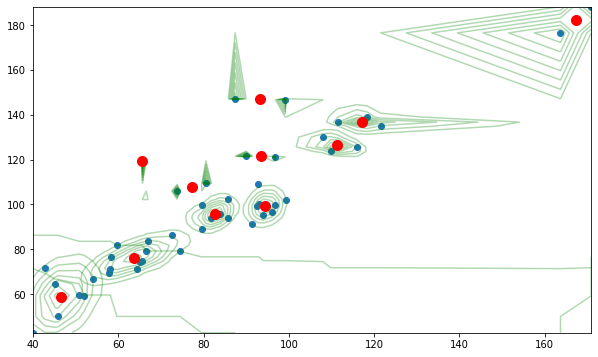

Converged: True
μ = 
[[117.10186372 136.87585252]
 [ 65.82219982  78.51158064]
 [ 94.51994579  99.25914612]
 [167.33231027 182.30935108]
 [ 43.92319029  68.21675726]
 [ 81.45472087  98.79229508]
 [ 93.24334343 146.90250319]
 [ 54.37426712  65.00109728]
 [ 93.34630095 121.38560268]
 [ 65.62619579 119.45591518]
 [111.20888718 126.47421632]
 [ 42.87640282  46.46339759]]
Σ = 
[[[ 1.76254028e+01 -1.73301560e+00]
  [-1.73301560e+00  2.87031288e+00]]

 [[ 2.72581482e+01  1.10125065e+01]
  [ 1.10125065e+01  2.22472926e+01]]

 [[ 6.49202119e+00  1.95168259e+00]
  [ 1.95168259e+00  2.25669751e+01]]

 [[ 1.29772835e+01  2.10608558e+01]
  [ 2.10608558e+01  3.41797027e+01]]

 [[ 1.53620553e+00 -4.46252717e+00]
  [-4.46252717e+00  1.29632155e+01]]

 [[ 1.50228397e+01 -8.68676225e+00]
  [-8.68676225e+00  4.03127345e+01]]

 [[ 3.42841814e+01 -1.33918750e+00]
  [-1.33918750e+00  5.23115162e-02]]

 [[ 8.67262657e+00  1.40343349e+01]
  [ 1.40343349e+01  2.44443255e+01]]

 [[ 1.15884241e+01 -4.60530044e-0

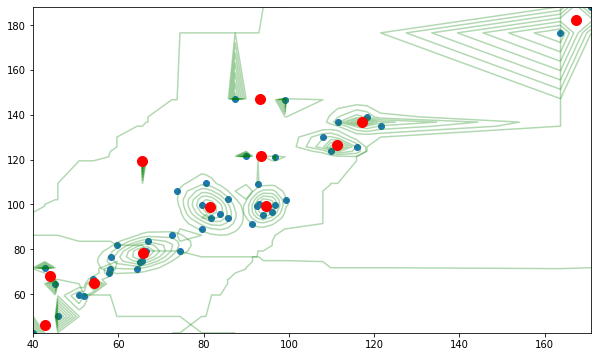

Converged: True
μ = 
[[ 93.34630096 121.38560268]
 [ 65.37152306  74.98790518]
 [167.33231027 182.30935108]
 [ 94.5512191   99.33616174]
 [111.27132873 129.03207193]
 [ 42.87647471  46.4634884 ]
 [ 65.62619579 119.45591518]
 [ 81.75644864  99.75757302]
 [ 93.24334342 146.90250319]
 [ 73.20618789  84.52364094]
 [ 58.39675594  74.79714562]
 [ 48.93850298  64.39447382]
 [119.92287268 136.95989962]]
Σ = 
[[[ 1.15884241e+01 -4.60530044e-01]
  [-4.60530044e-01  1.83027068e-02]]

 [[ 5.97359433e-01  2.08280687e+00]
  [ 2.08280687e+00  7.42400959e+00]]

 [[ 1.29772835e+01  2.10608558e+01]
  [ 2.10608558e+01  3.41797027e+01]]

 [[ 6.44954251e+00  1.73462057e+00]
  [ 1.73462057e+00  2.22294180e+01]]

 [[ 8.55254602e+00 -2.30801720e+00]
  [-2.30801720e+00  2.48279165e+01]]

 [[ 8.33015475e+00  1.05216092e+01]
  [ 1.05216092e+01  1.32895829e+01]]

 [[ 1.00000000e-06  3.83701944e-26]
  [ 3.83701944e-26  1.00000000e-06]]

 [[ 1.70842288e+01 -1.25731156e+01]
  [-1.25731156e+01  3.41564108e+01]]

 [[ 

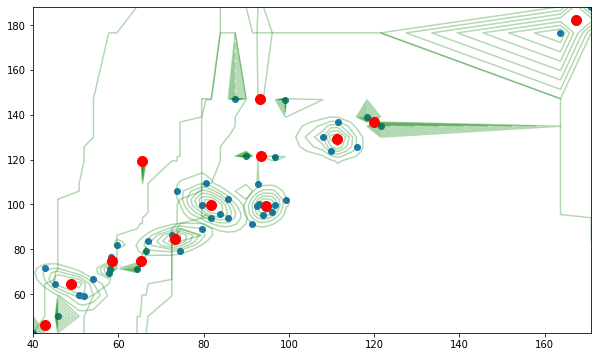

Converged: True
μ = 
[[ 94.52165481  99.26206373]
 [ 51.35184044  59.46500355]
 [114.15508676 131.67458226]
 [163.72991071 176.4630102 ]
 [ 71.28962364  83.05083493]
 [ 93.34629926 121.38560275]
 [ 93.24334343 146.90250319]
 [ 65.62619579 119.45591518]
 [ 81.43985115  98.68549703]
 [ 65.37456661  74.99877534]
 [170.93470982 188.15569196]
 [ 42.87647481  46.46348852]
 [ 43.92319037  68.21675702]
 [ 57.54569809  73.16409471]]
Σ = 
[[[ 6.48817815e+00  1.94273913e+00]
  [ 1.94273913e+00  2.25517227e+01]]

 [[ 3.37973049e-01 -1.14843296e-01]
  [-1.14843296e-01  3.90248859e-02]]

 [[ 2.31894855e+01  1.26014106e+01]
  [ 1.26014106e+01  3.19487807e+01]]

 [[ 1.00000000e-06  1.47018429e-25]
  [ 1.47018429e-25  1.00000000e-06]]

 [[ 1.01848602e+01 -3.37224890e+00]
  [-3.37224890e+00  8.30193447e+00]]

 [[ 1.15884241e+01 -4.60530044e-01]
  [-4.60530044e-01  1.83027068e-02]]

 [[ 3.42841814e+01 -1.33918750e+00]
  [-1.33918750e+00  5.23115162e-02]]

 [[ 1.00000000e-06  3.63507105e-26]
  [ 3.6350710

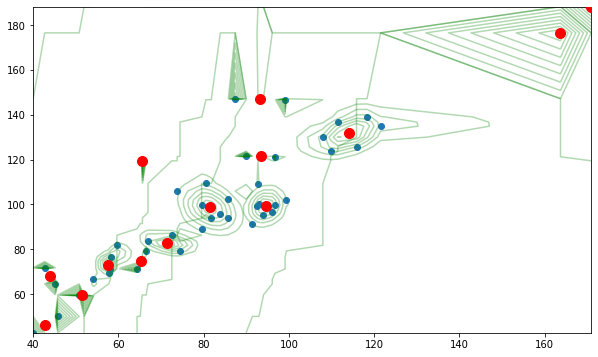

Converged: True
μ = 
[[ 49.28493743  61.18527731]
 [111.20888718 126.47421632]
 [ 82.69579035  95.80923444]
 [167.33231027 182.30935108]
 [ 61.61114821  74.93455151]
 [ 77.1474395  107.67442526]
 [ 93.24334343 146.90250319]
 [ 93.34630102 121.38560268]
 [ 94.74491826  97.77565841]
 [ 42.87647479  46.4634885 ]
 [117.10186372 136.87585252]
 [ 73.47705875  82.78564878]
 [ 42.68375319  71.81720344]
 [ 92.73509247 108.92179528]
 [ 65.62619579 119.45591518]]
Σ = 
[[[ 8.74529672e+00 -7.16791633e+00]
  [-7.16791633e+00  5.92824546e+00]]

 [[ 1.13869704e+01 -3.71618435e+00]
  [-3.71618435e+00  6.92573728e+00]]

 [[ 6.71634476e+00  4.25220348e+00]
  [ 4.25220348e+00  1.80408207e+01]]

 [[ 1.29772835e+01  2.10608558e+01]
  [ 2.10608558e+01  3.41797027e+01]]

 [[ 1.87497442e+01  1.33347926e+01]
  [ 1.33347926e+01  2.69426070e+01]]

 [[ 1.14145843e+01  5.79287308e+00]
  [ 5.79287308e+00  2.93986991e+00]]

 [[ 3.42841814e+01 -1.33918750e+00]
  [-1.33918750e+00  5.23115162e-02]]

 [[ 1.15884241e+01 -

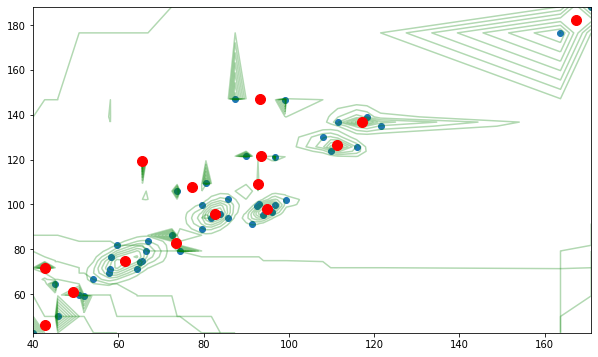

Converged: True
μ = 
[[117.10186372 136.87585252]
 [ 64.67096816  77.56685055]
 [ 94.48523338  99.16759563]
 [163.72991071 176.4630102 ]
 [ 42.87647479  46.4634885 ]
 [ 93.34630094 121.38560268]
 [ 77.14743951 107.67442526]
 [ 43.92319037  68.21675702]
 [ 93.24334343 146.90250319]
 [ 52.28058336  61.8455614 ]
 [ 82.69329156  95.8058391 ]
 [ 65.62619579 119.45591518]
 [111.20888718 126.47421632]
 [ 57.9855149   72.46311735]
 [ 73.4770411   82.78571327]
 [170.93470982 188.15569196]]
Σ = 
[[[ 1.76254028e+01 -1.73301560e+00]
  [-1.73301560e+00  2.87031288e+00]]

 [[ 5.84978343e+00 -1.08438013e+00]
  [-1.08438013e+00  1.84049909e+01]]

 [[ 6.49387636e+00  2.20486408e+00]
  [ 2.20486408e+00  2.29769162e+01]]

 [[ 1.00000000e-06  1.47018429e-25]
  [ 1.47018429e-25  1.00000000e-06]]

 [[ 8.33015475e+00  1.05216092e+01]
  [ 1.05216092e+01  1.32895829e+01]]

 [[ 1.15884241e+01 -4.60530044e-01]
  [-4.60530044e-01  1.83027068e-02]]

 [[ 1.14145843e+01  5.79287308e+00]
  [ 5.79287308e+00  2.9398699

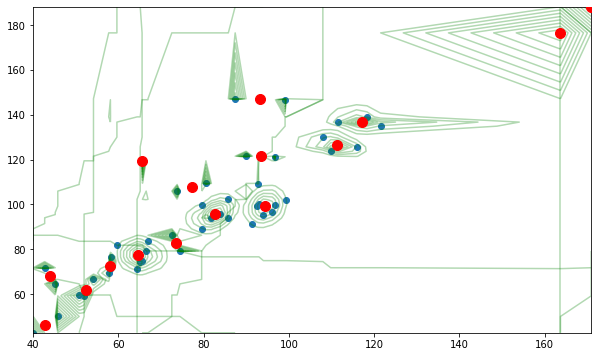

Converged: True
μ = 
[[ 47.63814326  63.84067721]
 [111.27132874 129.03207192]
 [ 80.04625828 104.14641782]
 [170.93470982 188.15569196]
 [ 62.81420066  80.23511679]
 [ 96.06860377 105.51426707]
 [ 65.62619579 119.45591518]
 [ 99.09861288 146.67378827]
 [ 93.34630102 121.38560268]
 [ 60.80372801  71.36281678]
 [ 42.87647481  46.46348852]
 [119.92287268 136.95989962]
 [ 93.97832777  97.05128936]
 [ 73.47704201  82.78570992]
 [ 82.6777653   93.17611408]
 [ 87.38807398 147.13121811]
 [163.72991071 176.4630102 ]]
Σ = 
[[[ 1.47354596e+01 -1.85462763e+01]
  [-1.85462763e+01  2.56556792e+01]]

 [[ 8.55254591e+00 -2.30801702e+00]
  [-2.30801702e+00  2.48279162e+01]]

 [[ 1.88892577e+01 -5.24444895e+00]
  [-5.24444895e+00  1.48628016e+01]]

 [[ 1.00000000e-06  1.57519746e-25]
  [ 1.57519746e-25  1.00000000e-06]]

 [[ 1.55704840e+01  5.20167016e+00]
  [ 5.20167016e+00  7.23572183e+00]]

 [[ 1.11130609e+01 -1.13598130e+01]
  [-1.13598130e+01  1.16120460e+01]]

 [[ 1.00000000e-06  3.83701944e-26]


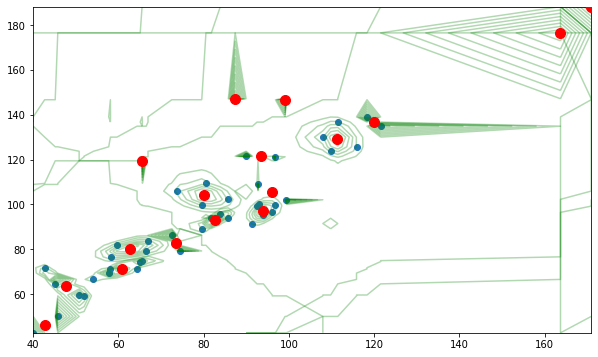

Converged: True
μ = 
[[ 62.64777495  75.93828151]
 [ 93.34630102 121.38560268]
 [170.93470982 188.15569196]
 [ 94.74505824  97.77572569]
 [ 49.2887702   61.18210566]
 [117.10186372 136.87585252]
 [ 93.24334343 146.90250319]
 [ 65.62619579 119.45591518]
 [ 77.14743941 107.67442521]
 [ 82.72017386  95.86187833]
 [111.20888718 126.47421632]
 [ 69.91845066  81.93167372]
 [ 56.65071839  69.1109273 ]
 [163.72991071 176.4630102 ]
 [ 39.99027423  42.81800064]
 [ 42.68375319  71.81720344]
 [ 92.73509247 108.92179528]
 [ 45.76267538  50.1089764 ]]
Σ = 
[[[ 9.56053384e+00 -6.34400084e+00]
  [-6.34400084e+00  1.16846103e+01]]

 [[ 1.15884241e+01 -4.60530044e-01]
  [-4.60530044e-01  1.83027068e-02]]

 [[ 1.00000000e-06  1.57519746e-25]
  [ 1.57519746e-25  1.00000000e-06]]

 [[ 6.83409686e+00  5.32518572e+00]
  [ 5.32518572e+00  1.07623267e+01]]

 [[ 8.73784226e+00 -7.16157191e+00]
  [-7.16157191e+00  5.92289868e+00]]

 [[ 1.76254028e+01 -1.73301560e+00]
  [-1.73301560e+00  2.87031288e+00]]

 [[ 3.4

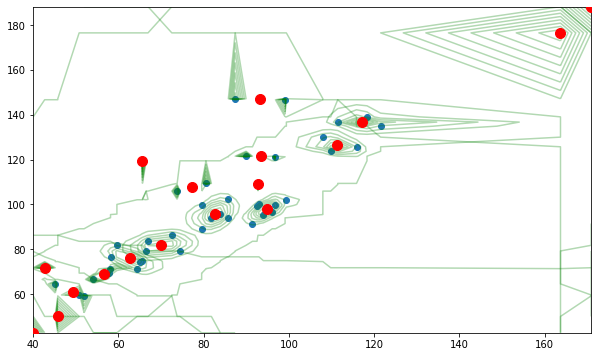

Converged: True
μ = 
[[ 92.73509247 108.92179528]
 [ 52.28058308  61.84556058]
 [170.93470982 188.15569196]
 [111.20888718 126.47421632]
 [ 79.51921237  89.17849171]
 [ 42.87647479  46.4634885 ]
 [ 65.62619579 119.45591518]
 [ 65.36890951  74.97831566]
 [ 87.38807398 147.13121811]
 [ 94.74711068  97.77822614]
 [ 77.14743915 107.67442508]
 [ 43.92319037  68.21675702]
 [117.10186372 136.87585252]
 [ 83.33415602  97.13181603]
 [ 68.3649216   82.71952256]
 [ 99.09861288 146.67378827]
 [ 93.34630102 121.38560268]
 [163.72991071 176.4630102 ]
 [ 57.98571366  72.46733794]]
Σ = 
[[[ 1.00000000e-06  5.14968399e-26]
  [ 5.14968399e-26  1.00000000e-06]]

 [[ 1.95057811e+00  4.34562059e+00]
  [ 4.34562059e+00  1.13609408e+01]]

 [[ 1.00000000e-06  1.57519746e-25]
  [ 1.57519746e-25  1.00000000e-06]]

 [[ 1.13869704e+01 -3.71618435e+00]
  [-3.71618435e+00  6.92573728e+00]]

 [[ 1.00000000e-06  3.39273298e-26]
  [ 3.39273298e-26  1.00000000e-06]]

 [[ 8.33015475e+00  1.05216092e+01]
  [ 1.05216092e+

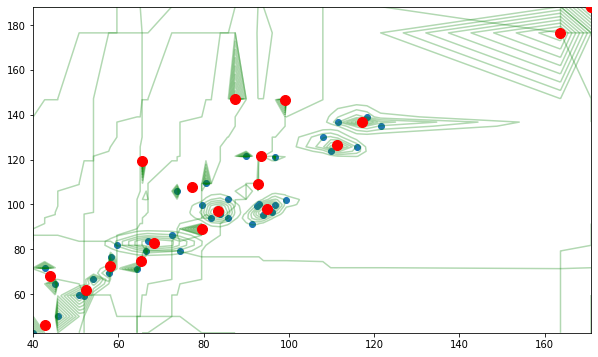

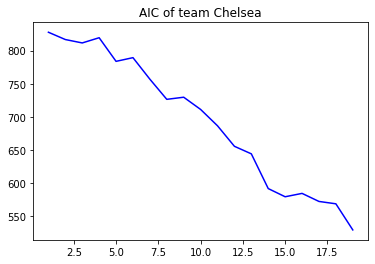

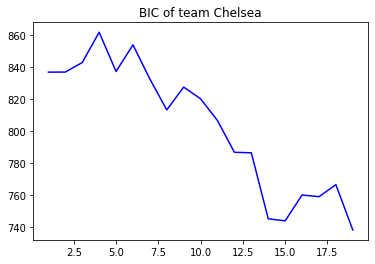

best k :   19


In [71]:
AIC = []
BIC = []

K = range(1,20)

for k in K:
    means_temp, covariance_temp, aic, bic= gmm_model(X_chelsea,k = k, aic_bic = 1)
    draw_plot(X_chelsea.to_numpy(), means_temp,covariance_temp)
    AIC.append(aic)
    BIC.append(bic)

plt.plot(K, AIC, 'b', label='aic')
plt.title("AIC of team Chelsea")
plt.show()

plt.plot(K, BIC, 'b', label='bic')
plt.title("BIC of team Chelsea")
plt.show()

sum_ab = [i + j for i,j in zip(AIC,BIC)]
best_k = sum_ab.index(min(sum_ab)) + 1
print("best k :  ", best_k)

# سوال ۹


<div dir=rtl>
ابتدا به خواندن داده ها از فایل csv می پردازیم.
</div>



In [179]:
dataset = pd.read_csv('/content/drive/MyDrive/penguins.csv')
dataset

species     island  ...  body_mass_g     sex
0    Adelie  Torgersen  ...       3750.0    MALE
1    Adelie  Torgersen  ...       3800.0  FEMALE
2    Adelie  Torgersen  ...       3250.0  FEMALE
3    Adelie  Torgersen  ...          NaN     NaN
4    Adelie  Torgersen  ...       3450.0  FEMALE
..      ...        ...  ...          ...     ...
339  Gentoo     Biscoe  ...          NaN     NaN
340  Gentoo     Biscoe  ...       4850.0  FEMALE
341  Gentoo     Biscoe  ...       5750.0    MALE
342  Gentoo     Biscoe  ...       5200.0  FEMALE
343  Gentoo     Biscoe  ...       5400.0    MALE

[344 rows x 7 columns]


<div dir=rtl>
حال در ادامه به preprocess این داده های می پردازیم. ابتدا باید ببینیم آیا این دیتاست داده های miss شده دارد یا نه. همانطور که در ادامه مشخص است تمام feature ها به جز island، دارای مقدار miss شده هستند. <br> برای پر کردن این مقادیر برای تمامی ستون ها از mean() آن ستون و برای ستون sex از مقدار بیشینه در آن ستون استفاده میکنیم.<br> در ادامه‌ی preprocess باید ستون هایی که مقدارشان به صورت string(object) است را encode کنیم که برای این کار از تابع replace استفاده شده است.
</div>



In [180]:
dataset.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [181]:
dataset['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [197]:
dataset['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [182]:
dataset['culmen_depth_mm'].fillna(dataset['culmen_depth_mm'].mean(),inplace=True)
dataset['culmen_length_mm'].fillna(dataset['culmen_length_mm'].mean(),inplace=True)
dataset['flipper_length_mm'].fillna(dataset['flipper_length_mm'].mean(),inplace=True)
dataset['body_mass_g'].fillna(dataset['body_mass_g'].mean(),inplace=True)
dataset['sex'].fillna('MALE',inplace=True)
dataset['sex'].replace({'.':'MALE'},inplace=True)
dataset.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [183]:
dataset.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [184]:
dataset.replace({"island": {"Torgersen": 1, "Dream": 2, "Biscoe": 3},"sex": {"MALE": 1, "FEMALE": 2}},inplace=True)


<div dir=rtl>
این بخش از این سوال مانند سوال قبل است. در این بخش ابتدا نمودار داده ها بر حسب دو feature داده شده را میکشیم. طبق این نمودار ها به نظر میرسد در حالت اول که دو feature به نام های culmen_length_mm و culmen_depth_mmهستند، gmm، discriminabilty بهتری داشته باشد.
</div>



In [185]:
def draw_scatter_plots(X1,X2,X3,features1,features2):
  for f1,f2 in zip(features1,features2):
    plt.scatter(X1[f1], X1[f2], label = "Adelie")
    plt.scatter(X2[f1], X2[f2], label = "Gentoo")
    plt.scatter(X3[f1], X3[f2], label = "Chinstrap")
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f1 + " - " + f2 + " scatter plot")
    plt.legend()
    plt.show()

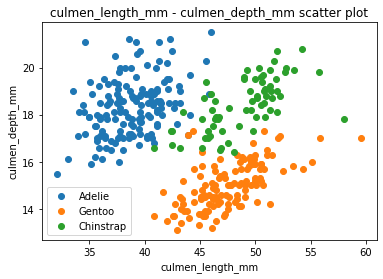

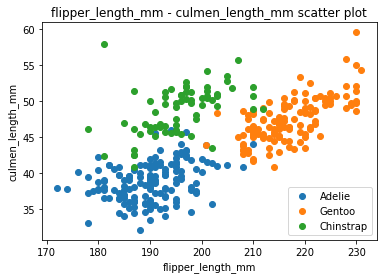

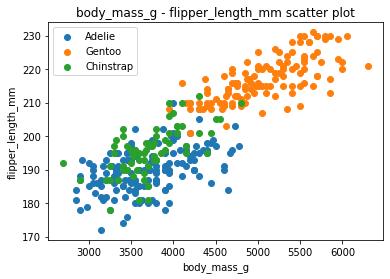

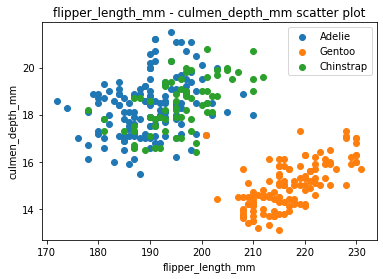

In [186]:
features1 = ['culmen_length_mm','flipper_length_mm','body_mass_g','flipper_length_mm']
features2 = ['culmen_depth_mm','culmen_length_mm','flipper_length_mm','culmen_depth_mm']

X1 = dataset[dataset['species'] == 'Adelie']
X2 = dataset[dataset['species'] == 'Gentoo']
X3 = dataset[dataset['species'] == 'Chinstrap']
draw_scatter_plots(X1,X2,X3,features1,features2)


<div dir=rtl>
حال به پیاده‌سازی gmm model ها می پردازیم و مانند سوال قبل برای هر مدل پارامتر ها را نشان داده و سپس نمودارscatter plot آن را به همراه کانتور ها میکشیم.<br> برای محاسبه خطا و دقت  به این صورت عمل میکنیم که به ازای هر دو فیچر، برای هر نمونه، pdf توزیع نرمال ( با میانگین و واریانسی که با مدل gmm با این دو feature بدست آورده بودیم) را برای هر کلاس محاسبه میکنیم. سپس بر اساس آنکه احتمال کدام کلاس بیشتر است، کلاس این نمونه را پیشبینی میکنیم. حال بررسی میکنیم که آیا این پیشبینی با لیبل نمونه همخوانی دارد یا خیر و به این صورت درصد خطا و درصد دقت را برای هر حالت محاسبه میکنیم. همانطور که حدس زده بودیم،‌حالت اول دقت بالاتر و خطای پایین تری دارد.
</div>



In [187]:
def gmm_model(X,features1,features2):
  means = []
  covariances = []
  for f1,f2 in zip(features1,features2):
    print('FOR '+f1+' AND '+f2+' :')
    data = X[[f1,f2]].to_numpy()
    GMM = GaussianMixture(n_components=1, covariance_type='full').fit(data)
    print('Converged:',GMM.converged_)
    means.append(GMM.means_) 
    covariances.append(GMM.covariances_)
    print('\u03BC = ', GMM.means_, sep="\n")
    print('\u03A3 = ', GMM.covariances_, sep="\n")
  return means,covariances

def calculate_error(X,y,feature1,feature2,means,covariances,features_ind):
  data = X[[feature1,feature2]].to_numpy()
  false = 0
  true = 0
  for sample_ind in range(len(data)):
    pred = -1
    max_prob = 0 
    for i in range(3):
      multi_normal = multivariate_normal(mean=means[i][features_ind][0],cov=covariances[i][features_ind][0])
      prob = multi_normal.pdf(data[sample_ind])
      pred = i if prob > max_prob else pred
      max_prob = prob if prob > max_prob else max_prob
    if y[sample_ind] != pred :
      false += 1
    else:
      true += 1
  error = false/len(X)
  accuracy = true/len(X)
  return error, accuracy

def draw_gmm_plot(X,labels,features1,features2,means,covariances):
  j = 0
  X1 = dataset[dataset['species'] == 'Adelie']
  X2 = dataset[dataset['species'] == 'Gentoo']
  X3 = dataset[dataset['species'] == 'Chinstrap']
  for f1,f2 in zip(features1,features2):
    plt.scatter(X1[f1], X1[f2], label = "Adelie")
    plt.scatter(X2[f1], X2[f2], label = "Gentoo")
    plt.scatter(X3[f1], X3[f2], label = "Chinstrap")
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f1 + " - " + f2 + " scatter plot")
    error, accuracy = calculate_error(X,labels,f1,f2,means,covariances,j)
    i = 0
    for d in [X1,X2,X3]:
      data = d[[f1,f2]].to_numpy()
      x,y = np.meshgrid(np.sort(data[:,0]),np.sort(data[:,1]))
      XY = np.array([x.flatten(),y.flatten()]).T
      multi_normal = multivariate_normal(mean=means[i][j][0],cov=covariances[i][j][0])
      plt.contour(np.sort(data[:,0]),np.sort(data[:,1]),multi_normal.pdf(XY).reshape(len(data),len(data)),alpha=0.3)
      plt.scatter(means[i][j][0][0],means[i][j][0][1],c='red',zorder=10,s=100)
      i += 1
    j += 1
    plt.legend()
    plt.show()
    print('error = ', error)
    print('accuracy = ', accuracy)

In [188]:
y = dataset['species'].replace({'Adelie':0,'Gentoo':1,'Chinstrap':2})

x1_means, x1_covariances = gmm_model(X1,features1,features2)

FOR culmen_length_mm AND culmen_depth_mm :
Converged: True
μ = 
[[38.82514428 18.33849454]]
Σ = 
[[[7.17242248 1.21183321]
  [1.21183321 1.47009688]]]
FOR flipper_length_mm AND culmen_length_mm :
Converged: True
μ = 
[[190.02575793  38.82514428]]
Σ = 
[[[42.98711183  5.96716097]
  [ 5.96716097  7.17242248]]]
FOR body_mass_g AND flipper_length_mm :
Converged: True
μ = 
[[3703.95891043  190.02575793]]
Σ = 
[[[2.09157074e+05 1.42145560e+03]
  [1.42145560e+03 4.29871118e+01]]]
FOR flipper_length_mm AND culmen_depth_mm :
Converged: True
μ = 
[[190.02575793  18.33849454]]
Σ = 
[[[42.98711183  2.3296682 ]
  [ 2.3296682   1.47009688]]]


In [189]:
x2_means, x2_covariances = gmm_model(X2,features1,features2)

FOR culmen_length_mm AND culmen_depth_mm :
Converged: True
μ = 
[[47.47598331 14.99960621]]
Σ = 
[[[9.44734828 1.85203058]
  [1.85203058 0.98490029]]]
FOR flipper_length_mm AND culmen_length_mm :
Converged: True
μ = 
[[217.05576778  47.47598331]]
Σ = 
[[[43.49463806 13.46708554]
  [13.46708554  9.44734828]]]
FOR body_mass_g AND flipper_length_mm :
Converged: True
μ = 
[[5068.96576118  217.05576778]]
Σ = 
[[[2.56148531e+05 2.37389278e+03]
  [2.37389278e+03 4.34946381e+01]]]
FOR flipper_length_mm AND culmen_depth_mm :
Converged: True
μ = 
[[217.05576778  14.99960621]]
Σ = 
[[[43.49463806  4.14114194]
  [ 4.14114194  0.98490029]]]


In [190]:
x3_means, x3_covariances = gmm_model(X3,features1,features2)

FOR culmen_length_mm AND culmen_depth_mm :
Converged: True
μ = 
[[48.83382353 18.42058824]]
Σ = 
[[[10.98665109  2.44136246]
  [ 2.44136246  1.27016536]]]
FOR flipper_length_mm AND culmen_length_mm :
Converged: True
μ = 
[[195.82352941  48.83382353]]
Σ = 
[[[50.11591796 11.06626298]
  [11.06626298 10.98665109]]]
FOR body_mass_g AND flipper_length_mm :
Converged: True
μ = 
[[3733.08823529  195.82352941]]
Σ = 
[[[1.45541198e+05 1.73267734e+03]
  [1.73267734e+03 5.01159180e+01]]]
FOR flipper_length_mm AND culmen_depth_mm :
Converged: True
μ = 
[[195.82352941  18.42058824]]
Σ = 
[[[50.11591796  4.62863322]
  [ 4.62863322  1.27016536]]]


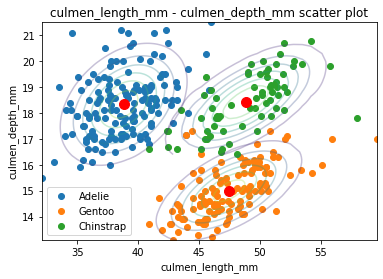

error =  0.03197674418604651
accuracy =  0.9680232558139535


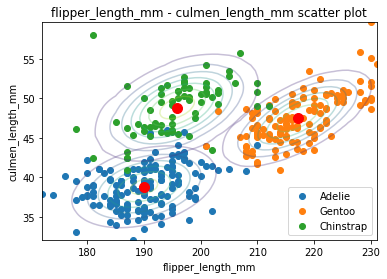

error =  0.04941860465116279
accuracy =  0.9505813953488372


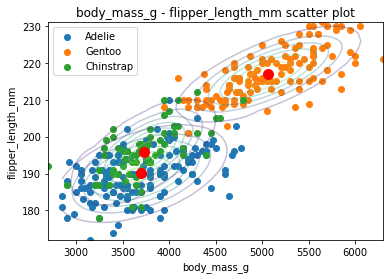

error =  0.19476744186046513
accuracy =  0.8052325581395349


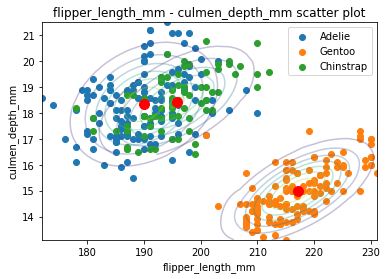

error =  0.20348837209302326
accuracy =  0.7965116279069767


In [191]:
means = [x1_means,x2_means,x3_means]
covariances = [x1_covariances,x2_covariances,x3_covariances]
draw_gmm_plot(dataset,y,features1,features2,means,covariances)


<div dir=rtl>
 دیدیم که ۲ feature اول بهترین نتیجه را داشتند. حال مولفه های گوسی را در این حالت بالا برده و نمودا aic و bic را میکشیم. این قسمت نیز مانند سوال قبل پیاده‌سازی شده است. برای هر کلاس k بهینه را به دست آورده و چاپ کرده ایم.
</div>



In [192]:
def aic_bic(X,f1,f2,species):
  AIC = []
  BIC = []

  K = [2,3,4,5]

  for k in K:
    data = X[[f1,f2]].to_numpy()
    GMM = GaussianMixture(n_components=k, covariance_type='full').fit(data)
    AIC.append(GMM.aic(data))
    BIC.append(GMM.bic(data))

  plt.plot(K, AIC, 'b', label='aic')
  plt.plot(K, BIC, 'r', label='bic')
  plt.title(species)
  plt.show()

  sum_ab = [i + j for i,j in zip(AIC,BIC)]
  best_k = K[sum_ab.index(min(sum_ab))]
  print("best k :  ", best_k)


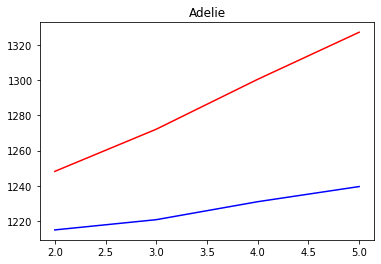

best k :   2


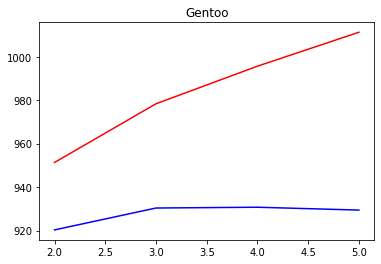

best k :   2


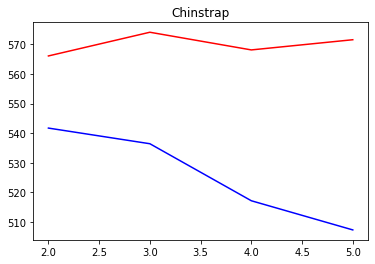

best k :   5


In [193]:
f1 = features1[0]
f2 = features2[0]
aic_bic(X1,f1,f2,'Adelie')
aic_bic(X2,f1,f2,'Gentoo')
aic_bic(X3,f1,f2,'Chinstrap')

# سوال ۱۰

In [375]:
from sklearn import datasets
noisy_moons=datasets.make_moons(n_samples=500, noise=0.11)
noisy_moons

(array([[ 2.06941243e+00,  4.58227287e-01],
        [-7.80188965e-01,  7.16853733e-01],
        [ 1.48218903e-01,  9.67525082e-01],
        [ 2.36978827e-01,  9.71785410e-01],
        [ 1.50553559e+00, -4.80087815e-01],
        [-1.10412344e+00,  1.31304495e-01],
        [ 1.39791814e+00, -4.47609262e-01],
        [ 1.80751322e+00, -6.41427035e-02],
        [ 1.47036495e+00, -2.76418522e-01],
        [ 7.21410000e-02,  1.47867702e-01],
        [ 1.27602759e-01,  1.00202121e+00],
        [-1.10399451e+00,  4.07427952e-01],
        [ 3.72281535e-02,  1.02728809e+00],
        [-8.58302452e-02,  1.19324724e+00],
        [ 9.49274804e-01,  2.79376152e-01],
        [-8.12820650e-01,  6.62307717e-01],
        [ 8.06501143e-01,  7.23851693e-01],
        [ 7.95528776e-01,  7.09829151e-01],
        [-1.05058184e+00,  1.50173886e-01],
        [ 5.68918773e-01, -1.38452784e-01],
        [-7.96815945e-01,  5.63939981e-01],
        [ 9.40809639e-01, -4.32324563e-01],
        [ 1.52320676e-01,  1.025


<div dir=rtl>
در این بخش ابتدا به همان شیوه گفته شده داده ها را میخواینم. سپس آن ها را توسط یک نمودار scatter میکشیم.
</div>



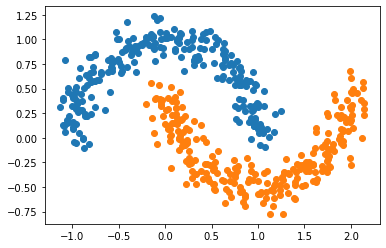

In [454]:
X, y = noisy_moons

X1 = []
X2 = []
for i in range(len(X)):
    if y[i]:
        X2.append(X[i])
    else:
        X1.append(X[i])

X1 = np.array(X1)
X2 = np.array(X2)
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.show()


<div dir=rtl>
حال در بخش اول سعی بر این است که هر کلاس را توسط توزیع نرمال تخریب بزنیم. برای این کار ابتدا با تخمین بیزی پارامتر ها را تخمین میزنیم. سپس برای کشیدن نمودار داده ها به همراه کانتور مانند دو سوال قبل عمل میکنیم با این تفاوت که در اینجا نمیتوانیم از تابع multivarient_normal استفاده کنیم. میدانیم این تابع یک توزیع گوسی را با میانگین و کواریانسی که به آن میدهیم پیاده‌سازی میکند و سپس با صدا زدن تابع pdf، احتمال یک داده را با این توزیع بر میگرداند. برای جا گذاری یک تابع که pdf یک توزیع گوسی با میانگین و کواریانس مشخص را بر میگرداند ، پیاده‌سازی کرده ایم.
</div>



In [391]:
from numpy.linalg import inv, det

def parameteres_basedon_bayes_estimation(X, mean_0, covariance_0):
    t_covariance = np.cov(X.T)
    t_mean = np.array([np.mean(X[:,0]), np.mean(X[:,1])]).reshape(2,1)
    
    covariance_n = (covariance_0/len(X)).dot(inv(covariance_0 + (t_covariance / len(X)))).dot(t_covariance)
    mean_n = covariance_0.dot(inv(covariance_0 + (t_covariance / len(X)))).dot(t_mean) + (t_covariance.dot(inv(covariance_0 + (t_covariance / len(X)))).dot(mean_0))/len(X)
    
    return mean_n, t_covariance + covariance_n

def gaussian_pdf(X, mean, covariance):
    X = X.reshape(2,1)
    mean = mean.reshape(2,1)
    d = X.shape[0]
    pdf = (np.exp(-(1/2) * ((X - mean).T.dot(inv(covariance)).dot(X-mean)))/((((2 * np.pi)**d) * det(covariance))**(1/2)))

    return pdf

def draw_gaussian_plot(X,means,covariances,color):
  x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
  XY = np.array([x.flatten(),y.flatten()]).T
  ax0.scatter(X[:,0],X[:,1],c = color)
  for m,c in zip(means,covariances):
      multi_normal_pdf = []
      for xy in XY:
          multi_normal_pdf.append(gaussian_pdf(xy, m, c)[0][0])
      ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),np.array(multi_normal_pdf).reshape(len(X),len(X)),colors=color,alpha=0.3)
      ax0.scatter(m[0],m[1],c='green',zorder=10,s=100)

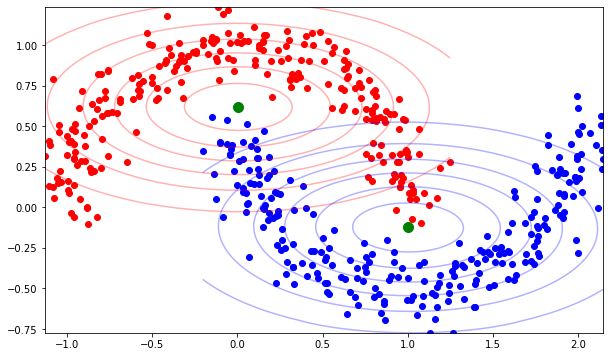

In [392]:
mean1 = np.array([[0],[0.5]])
mean2 = np.array([[1],[0]])
covariance = np.array([[1,0.5],[0.5,0.5]])


mean_n_1, covariance_n_1 = parameteres_basedon_bayes_estimation(X1, mean1, covariance)
mean_n_2, covariance_n_2 = parameteres_basedon_bayes_estimation(X2, mean2, covariance)
fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
draw_gaussian_plot(X1,[mean_n_1],[covariance_n_1],'red')
draw_gaussian_plot(X2,[mean_n_2],[covariance_n_2],'blue')
plt.show()


<div dir=rtl>
در این بخش به پیاده سازی یک مدل gmm میپردازیم. برای انجام ا ین بخش از چند لینک که در پایین این بخش آمده است استفاده کردم. این کلاس چندین تابع دارد که به شرح زیر است.<br> تابع fit تابعی است که عملیات اصلی را انجام میدهد. در این تابع ابتدا برخی مقادیر اولیه داده‌میشود و سپس به صورت iterative مراحل e-step و m-step انجام می‌شوند. در تابع e-step ابتدا وزن ها که در نهایت میانگین آن ها ضریب آلفا را می سازد، بدست می‌آیند. برای بدست آوردن این وزن ها طبق فرمول های likelihood و فرمول هایی که در درس آمده است پیش رفته‌ایم.
</div>

---
لینک ها:
https://github.com/saniikakulkarni/Gaussian-Mixture-Model-from-scratch/blob/main/Gaussian_Mixture_Model_from_scratch.ipynb
https://towardsdatascience.com/gaussian-mixture-models-implemented-from-scratch-1857e40ea566





In [482]:
class GMM:
  def __init__(self, k, max_iter=5):
      self.k = k
      self.max_iter = int(max_iter) 
      self.means = []
      self.covariances = []
      self.alpha = np.full(shape=self.k, fill_value=1/self.k) 

  def e_step(self, X):
      self.weights = self.predict_proba(X)
      self.alpha = self.weights.mean(axis=0)

  def m_step(self, X):
    for i in range(self.k):
      weight = self.weights[:, [i]]
      total_weight = weight.sum()
      self.means[i] = (X * weight).sum(axis=0) / total_weight
      self.covariances[i] = np.cov(X.T,aweights=(weight/total_weight).flatten(), bias=True)

  def fit(self, X):
    self.n = len(X)
    self.weights = np.full(shape=X.shape, fill_value=1/self.k)
    random_row = randint(0, self.n, self.k)
    init_cov = np.cov(X.T)
    
    for i in range(self.k):
        self.means.append(X[random_row[i]])
        self.covariances.append(init_cov)
    for iteration in range(self.max_iter):
        self.e_step(X)
        self.m_step(X)
          
  def predict_proba(self, X):
    weights = np.zeros((len(X), self.k))
    for i in range(len(X)):
      for j in range(self.k):
        likelihood = gaussian_pdf(X[i], self.means[j], self.covariances[j])
        weights[i][j] = self.alpha[j] * likelihood
        weights[i][j] /= sum([self.alpha[l]*gaussian_pdf(X[i], self.means[l], self.covariances[l]) for l in range(self.k)])
    return weights
  
  def get_aic_bic(self, X):
    l = 1
    likelihood = np.zeros( (self.n, self.k) ) 
    for i in range(len(X)):
      for j in range(self.k):
        likelihood[i,j] = gaussian_pdf(X[i], self.means[j], self.covariances[j])[0][0]
    for i in likelihood:
        l *= i.dot(self.alpha)
    aic = -2 * np.log(l) + 2 * self.k
    bic = -2 * np.log(l) + np.log(self.n) * self.k
    return  aic, bic 



<div dir=rtl>
حال در این بخش نمودار scatter داده ها به همراه کانتور را برای ۳ مدل با تعداد کامپوننت های ۳،۸ و ۱۶ رسم کرده ایم. توجه داشته باشید که چون مقدار اولیه میانگین ها به صورت رندوم مشخص می شود با هر بار اجرا ممکن است به مدل مختلفی برسیم.
</div>



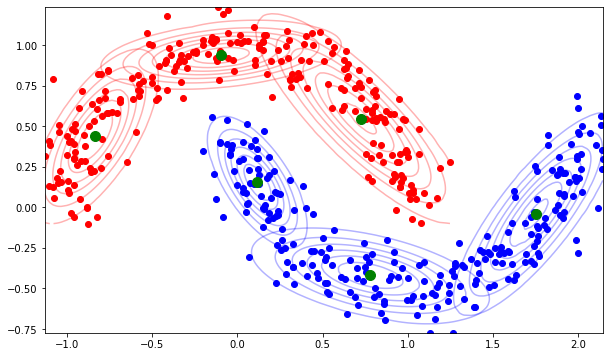

In [478]:
gmm_model1 = GMM(3)
gmm_model1.fit(X1)

gmm_model2 = GMM(3)
gmm_model2.fit(X2)

fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
draw_gaussian_plot(X1,gmm_model1.means,gmm_model1.covariances,'red')
draw_gaussian_plot(X2,gmm_model2.means,gmm_model2.covariances,'blue')
plt.show()

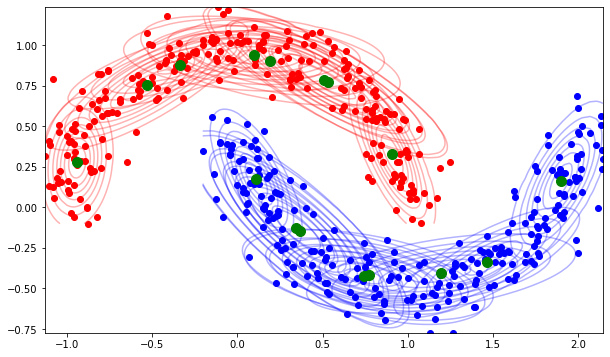

In [480]:
gmm_model1 = GMM(8)
gmm_model1.fit(X1)

gmm_model2 = GMM(8)
gmm_model2.fit(X2)

fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
draw_gaussian_plot(X1,gmm_model1.means,gmm_model1.covariances,'red')
draw_gaussian_plot(X2,gmm_model2.means,gmm_model2.covariances,'blue')
plt.show()

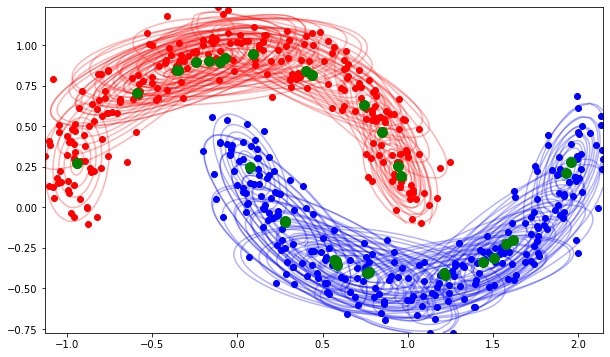

In [458]:
gmm_model1 = GMM(16)
gmm_model1.fit(X1)

gmm_model2 = GMM(16)
gmm_model2.fit(X2)

fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
draw_gaussian_plot(X1,gmm_model1.means,gmm_model1.covariances,'red')
draw_gaussian_plot(X2,gmm_model2.means,gmm_model2.covariances,'blue')
plt.show()


<div dir=rtl>
در نهایت به کشیدن نمودار aic و bic مپردازیم. در این بخش همانند دو سوال قبل عمل میکنیم، تنها به جای کتابخانه از کلاسی که خودمان پیاده‌سازی کرده‌ایم استفاده میکنیم.
</div>



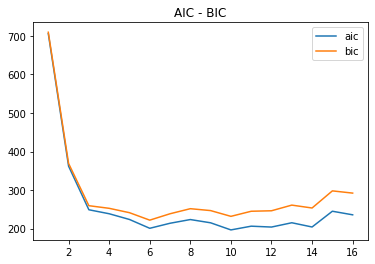

best k :   6


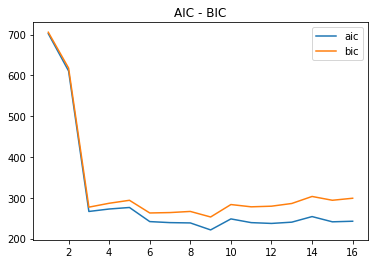

best k :   9


In [483]:
def plot_aic_bic(X,K):
  AIC = []
  BIC = []
  for k in K:
    gmm_model = GMM(k)
    gmm_model.fit(X)      
    aic, bic = gmm_model.get_aic_bic(X)
    AIC.append(aic)
    BIC.append(bic)
  plt.plot(K, AIC, label='aic')
  plt.plot(K, BIC, label='bic')
  plt.title("AIC - BIC")
  plt.legend()
  plt.show()
  sum_ab = [i + j for i,j in zip(AIC,BIC)]
  best_k = sum_ab.index(min(sum_ab)) + 1
  print("best k :  ", best_k)

K = range(1,17)
plot_aic_bic(X1,K)
plot_aic_bic(X2,K)